In [1]:
import pandas as pd

# Define the list of file paths
file_paths = [
    '/content/bangalore_cars.xlsx',
    '/content/chennai_cars.xlsx',
    '/content/delhi_cars.xlsx',
    '/content/hyderabad_cars.xlsx',
    '/content/jaipur_cars.xlsx',
    '/content/kolkata_cars.xlsx'
]

# Load the datasets into a list of DataFrames
dfs = [pd.read_excel(file_path) for file_path in file_paths]

# Print the first few rows of each DataFrame to inspect the data
for df in dfs:
    print(df.head())


                                      new_car_detail  \
0  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
1  {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...   
2  {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...   
3  {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...   
4  {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...   

                                    new_car_overview  \
0  {'heading': 'Car overview', 'top': [{'key': 'R...   
1  {'heading': 'Car overview', 'top': [{'key': 'R...   
2  {'heading': 'Car overview', 'top': [{'key': 'R...   
3  {'heading': 'Car overview', 'top': [{'key': 'R...   
4  {'heading': 'Car overview', 'top': [{'key': 'R...   

                                     new_car_feature  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...   
1  {'heading': 'Features', 'top': [{'value': 'Pow...   
2  {'heading': 'Features', 'top': [{'value': 'Pow...   
3  {'heading': 'Features', 'top': [{'value': 'Pow...   
4  {'heading': 'Features', 'top': [{'value': '

In [2]:
import pandas as pd
import ast

# File paths and city names
file_paths = [
    '/content/bangalore_cars.xlsx',
    '/content/chennai_cars.xlsx',
    '/content/delhi_cars.xlsx',
    '/content/hyderabad_cars.xlsx',
    '/content/jaipur_cars.xlsx',
    '/content/kolkata_cars.xlsx'
]
cities = ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Kolkata']

# Function to safely parse JSON-like strings
def parse_json(json_str):
    try:
        return ast.literal_eval(json_str)
    except (ValueError, SyntaxError):
        return {}

# Function to extract details from `new_car_detail`
def extract_car_details(json_str):
    data = parse_json(json_str)
    return {
        'ignition_type': data.get('it'),
        'fuel_type': data.get('ft'),
        'body_type': data.get('bt'),
        'kilometers_driven': data.get('km'),
        'transmission_type': data.get('transmission'),
        'owner_number': data.get('ownerNo'),
        'ownership_details': data.get('owner'),
        'manufacturer': data.get('oem'),
        'model': data.get('model'),
        'model_year': data.get('modelYear'),
        'variant_name': data.get('variantName'),
        'price': data.get('price'),
        'actual_price': data.get('priceActual'),
        'price_saving': data.get('priceSaving'),
        'fixed_price_text': data.get('priceFixedText'),
        'trending_text': str(data.get('trendingText')),  # Convert to string if nested
    }

# Function to extract features from `new_car_feature`
def extract_features(json_str):
    data = parse_json(json_str)
    features = [item.get('value') for item in data.get('top', [])]
    detailed_features = {feature.get('key'): feature.get('value') for feature in data.get('data', [])}
    return {
        'top_features': ', '.join(features),
        **detailed_features  # Unpack detailed features into columns
    }

# Function to extract specifications from `new_car_specs`
def extract_specs(json_str):
    data = parse_json(json_str)
    specs = {item.get('key'): item.get('value') for item in data.get('top', [])}
    detailed_specs = {spec.get('key'): spec.get('value') for spec in data.get('data', [])}
    return {**specs, **detailed_specs}  # Combine top and detailed specs

# Function to extract overview from `new_car_overview`
def extract_overview(json_str):
    data = parse_json(json_str)
    overview = {item.get('key'): item.get('value') for item in data.get('top', [])}
    return overview

# Function to add prefixes to column names
def add_prefix(df, prefix):
    return df.rename(columns=lambda col: f"{prefix}{col}")

# Process each file
processed_dfs = []
for file_path, city in zip(file_paths, cities):
    # Load the dataset
    df = pd.read_excel(file_path)

    # Extract data from nested columns
    detail_df = pd.json_normalize(df['new_car_detail'].apply(extract_car_details))
    feature_df = pd.json_normalize(df['new_car_feature'].apply(extract_features))
    specs_df = pd.json_normalize(df['new_car_specs'].apply(extract_specs))
    overview_df = pd.json_normalize(df['new_car_overview'].apply(extract_overview))

    # Add prefixes to column names to ensure uniqueness
    detail_df = add_prefix(detail_df, "Detail_")
    feature_df = add_prefix(feature_df, "Feature_")
    specs_df = add_prefix(specs_df, "Spec_")
    overview_df = add_prefix(overview_df, "Overview_")

    # Add city column for context
    df['City'] = city

    # Combine all processed data
    df_processed = pd.concat(
        [
            df.drop(columns=['new_car_detail', 'new_car_feature', 'new_car_specs', 'new_car_overview']),
            detail_df, feature_df, specs_df, overview_df
        ],
        axis=1
    )
    processed_dfs.append(df_processed)

# Concatenate all processed DataFrames
final_df = pd.concat(processed_dfs, ignore_index=True)

# Save the final processed dataset
final_df.to_excel('/content/processed_car_data_complete.xlsx', index=False)

# Display the first few rows of the final dataset
print(final_df.head())


                                           car_links       City  \
0  https://www.cardekho.com/used-car-details/used...  Bangalore   
1  https://www.cardekho.com/buy-used-car-details/...  Bangalore   
2  https://www.cardekho.com/used-car-details/used...  Bangalore   
3  https://www.cardekho.com/buy-used-car-details/...  Bangalore   
4  https://www.cardekho.com/used-car-details/used...  Bangalore   

   Detail_ignition_type Detail_fuel_type Detail_body_type  \
0                     0           Petrol        Hatchback   
1                     0           Petrol              SUV   
2                     0           Petrol        Hatchback   
3                     0           Petrol            Sedan   
4                     0           Diesel              SUV   

  Detail_kilometers_driven Detail_transmission_type  Detail_owner_number  \
0                 1,20,000                   Manual                    3   
1                   32,706                   Manual                    2   
2 

In [3]:
final_df

car_links       City  \
0     https://www.cardekho.com/used-car-details/used...  Bangalore   
1     https://www.cardekho.com/buy-used-car-details/...  Bangalore   
2     https://www.cardekho.com/used-car-details/used...  Bangalore   
3     https://www.cardekho.com/buy-used-car-details/...  Bangalore   
4     https://www.cardekho.com/used-car-details/used...  Bangalore   
...                                                 ...        ...   
8364  https://www.cardekho.com/used-car-details/used...    Kolkata   
8365  https://www.cardekho.com/used-car-details/used...    Kolkata   
8366  https://www.cardekho.com/used-car-details/used...    Kolkata   
8367  https://www.cardekho.com/used-car-details/used...    Kolkata   
8368  https://www.cardekho.com/used-car-details/used...    Kolkata   

      Detail_ignition_type Detail_fuel_type Detail_body_type  \
0                        0           Petrol        Hatchback   
1                        0           Petrol              SUV   
2                        0           Petrol        Hatchback   
3                        0           Petrol            Sedan   
4                        0           Diesel              SUV   
...                    ...              ...              ...   
8364                     0           Petrol        Hatchback   
8365                     0           Petrol        Hatchback   
8366                     0           Petrol            Sedan   
8367                     0           Petrol        Hatchback   
8368                     0           Diesel              SUV   

     Detail_kilometers_driven Detail_transmission_type  Detail_owner_number  \
0                    1,20,000                   Manual                    3   
1                      32,706                   Manual                    2   
2                      11,949                   Manual                    1   
3                      17,794                   Manual                    1   
4                      60,000                   Manual                    1   
...                       ...                      ...                  ...   
8364                   10,000                   Manual                    1   
8365                 1,20,000                   Manual                    1   
8366                   50,000                Automatic                    3   
8367                   40,000                   Manual                    1   
8368                 1,20,000                   Manual                    2   

     Detail_ownership_details Detail_manufacturer  ...  \
0                   3rd Owner              Maruti  ...   
1                   2nd Owner                Ford  ...   
2                   1st Owner                Tata  ...   
3                   1st Owner             Hyundai  ...   
4                   1st Owner              Maruti  ...   
...                       ...                 ...  ...   
8364                1st Owner              Maruti  ...   
8365                1st Owner              Maruti  ...   
8366                3rd Owner       Mercedes-Benz  ...   
8367                1st Owner              Maruti  ...   
8368                2nd Owner             Renault  ...   

     Overview_Registration Year  Overview_Insurance Validity  \
0                          2015        Third Party insurance   
1                      Feb 2018                Comprehensive   
2                     Sept 2018                Comprehensive   
3                      Dec 2014                Comprehensive   
4                          2015        Third Party insurance   
...                         ...                          ...   
8364                       2022        Third Party insurance   
8365                       2014        Third Party insurance   
8366                       2011        Third Party insurance   
8367                       2012        Third Party insurance   
8368                       2017        Third Party insurance   

     Overview_Fuel Ty

In [4]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   car_links                     8369 non-null   object 
 1   City                          8369 non-null   object 
 2   Detail_ignition_type          8369 non-null   int64  
 3   Detail_fuel_type              8369 non-null   object 
 4   Detail_body_type              8369 non-null   object 
 5   Detail_kilometers_driven      8369 non-null   object 
 6   Detail_transmission_type      8369 non-null   object 
 7   Detail_owner_number           8369 non-null   int64  
 8   Detail_ownership_details      8369 non-null   object 
 9   Detail_manufacturer           8369 non-null   object 
 10  Detail_model                  8369 non-null   object 
 11  Detail_model_year             8369 non-null   int64  
 12  Detail_variant_name           8369 non-null   object 
 13  Det

In [5]:
import pandas as pd

# Display all columns
pd.set_option('display.max_columns', None)

print(final_df)


                                              car_links       City  \
0     https://www.cardekho.com/used-car-details/used...  Bangalore   
1     https://www.cardekho.com/buy-used-car-details/...  Bangalore   
2     https://www.cardekho.com/used-car-details/used...  Bangalore   
3     https://www.cardekho.com/buy-used-car-details/...  Bangalore   
4     https://www.cardekho.com/used-car-details/used...  Bangalore   
...                                                 ...        ...   
8364  https://www.cardekho.com/used-car-details/used...    Kolkata   
8365  https://www.cardekho.com/used-car-details/used...    Kolkata   
8366  https://www.cardekho.com/used-car-details/used...    Kolkata   
8367  https://www.cardekho.com/used-car-details/used...    Kolkata   
8368  https://www.cardekho.com/used-car-details/used...    Kolkata   

      Detail_ignition_type Detail_fuel_type Detail_body_type  \
0                        0           Petrol        Hatchback   
1                        0     

In [6]:
#droping Detail_actual_price: Detail_fixed_price_text:

final_df.drop(columns=['Detail_actual_price', 'Detail_fixed_price_text'], inplace=True)


In [7]:
final_df.dtypes

car_links                        object
City                             object
Detail_ignition_type              int64
Detail_fuel_type                 object
Detail_body_type                 object
Detail_kilometers_driven         object
Detail_transmission_type         object
Detail_owner_number               int64
Detail_ownership_details         object
Detail_manufacturer              object
Detail_model                     object
Detail_model_year                 int64
Detail_variant_name              object
Detail_price                     object
Detail_price_saving              object
Detail_trending_text             object
Feature_top_features             object
Feature_None                    float64
Spec_Mileage                     object
Spec_Engine                      object
Spec_Max Power                   object
Spec_Torque                      object
Spec_Seats                       object
Spec_None                        object
Spec_Wheel Size                  object
Overview_Registration Year       object
Overview_Insurance Validity      object
Overview_Fuel Type               object
Overview_Seats                   object
Overview_Kms Driven              object
Overview_RTO                     object
Overview_Ownership               object
Overview_Engine Displacement     object
Overview_Transmission            object
Overview_Year of Manufacture    float64
dtype: object

In [8]:
# Converting Detail_price to numeric after standardizing the format
def clean_price(value):
    try:
        # Removing unwanted characters and standardizing
        value = value.replace('â‚¹', '').replace('₹', '').replace(',', '').strip()
        if 'Lakh' in value:
            return float(value.replace('Lakh', '').strip()) * 100000  # Convert Lakh to a numeric price
        elif 'Crore' in value:
            return float(value.replace('Crore', '').strip()) * 10000000  # Convert Crore to numeric price
        else:
            return float(value)  # Handle other cases (e.g., '400000')
    except:
        return None  # If conversion fails, return None for missing or invalid data

# Apply the function to clean Detail_price
final_df['Detail_price'] = final_df['Detail_price'].apply(clean_price)

# Verify the result
print(final_df['Detail_price'].head())


0    400000.0
1    811000.0
2    585000.0
3    462000.0
4    790000.0
Name: Detail_price, dtype: float64


In [9]:
# Numerical conversion: Converting string/object columns to numeric types

# Detail_kilometers_driven: Removing commas and converting to integer
final_df['Detail_kilometers_driven'] = final_df['Detail_kilometers_driven'].astype(str).str.replace(',', '').replace('nan', '0').astype(int)

# Spec_Engine: Removing "CC" and converting to integer
final_df['Spec_Engine'] = final_df['Spec_Engine'].fillna('0').astype(str).str.replace(' CC', '').astype(int)

# Spec_Mileage: Extracting numeric part and converting to float
# Spec_Mileage: Handle NaN and extract numeric part
final_df['Spec_Mileage'] = final_df['Spec_Mileage'] \
    .dropna() \
    .astype(str) \
    .str.split(' ') \
    .str[0] \
    .astype(float)
# Spec_Max Power: Extracting numeric value and converting to float
final_df['Spec_Max Power'] = final_df['Spec_Max Power'] \
    .astype(str) \
    .str.extract('(\d+\.\d+|\d+)') \
    .astype(float)

# Spec_Torque: Extracting numeric value and converting to float
final_df['Spec_Torque'] = final_df['Spec_Torque'] \
    .astype(str) \
    .str.extract('(\d+\.\d+|\d+)') \
    .astype(float)

# Overview_Kms Driven: Removing commas, extracting numeric part, and converting to integer
final_df['Overview_Kms Driven'] = final_df['Overview_Kms Driven'] \
    .fillna('0') \
    .astype(str) \
    .str.replace(',', '') \
    .str.split(' ') \
    .str[0] \
    .astype(int)

# Overview_Year of Manufacture: Converting to integer
# Replace NaN with the median value
median_value = final_df['Overview_Year of Manufacture'].median()
final_df['Overview_Year of Manufacture'] = final_df['Overview_Year of Manufacture'].fillna(median_value).astype(int)


In [10]:
# Overview_Engine Displacement: Extracting numeric part and filling NaN values with 0
final_df['Overview_Engine Displacement'] = final_df['Overview_Engine Displacement'].str.extract('(\d+)')
final_df['Overview_Engine Displacement'] = final_df['Overview_Engine Displacement'].fillna(0).astype(int)

# Overview_Seats: Extracting numeric part and filling NaN values with 0
final_df['Overview_Seats'] = final_df['Overview_Seats'].str.extract('(\d+)')
final_df['Overview_Seats'] = final_df['Overview_Seats'].fillna(0).astype(int)

# Detail_ownership_details: Extracting numeric part and filling NaN values with 0
final_df['Detail_ownership_details'] = final_df['Detail_ownership_details'].str.extract('(\d+)')
final_df['Detail_ownership_details'] = final_df['Detail_ownership_details'].fillna(0).astype(int)


In [11]:
# Categorical conversion: Converting string/object columns to category type for memory optimization

categorical_columns = [
    'Detail_fuel_type',
    'Detail_body_type',
    'Detail_transmission_type',
    'Detail_owner_number',
    'Detail_ownership_details',
    'Detail_manufacturer',
    'Overview_Fuel Type',
    'Overview_Transmission'
]

for col in categorical_columns:
    final_df[col] = final_df[col].astype('category')


In [12]:
# remaining colums to change dtypes

# 2. Extract numeric part and convert 'Spec_Seats' to int, handling NaN values
final_df['Spec_Seats'] = final_df['Spec_Seats'].astype(str).str.extract('(\d+)').astype(float)  # Extract numbers as float
final_df['Spec_Seats'] = final_df['Spec_Seats'].fillna(0).astype(int)  # Replace NaN with 0 and convert to int


# 3. Extract numeric part and convert 'Spec_Wheel Size' to float
# Convert 'Spec_Wheel Size' to string first, then extract numeric values
final_df['Spec_Wheel Size'] = final_df['Spec_Wheel Size'].astype(str).str.extract('(\d+(\.\d+)?)', expand=False)[0].astype(float)
final_df['Spec_Wheel Size'] = final_df['Spec_Wheel Size'].fillna(0)

# 4. Convert 'Overview_Registration Year' to int
final_df['Overview_Registration Year'] = pd.to_numeric(final_df['Overview_Registration Year'], errors='coerce')

# 5. Convert 'Overview_Insurance Validity' to datetime
# Example date format: 'DD-MM-YYYY'
final_df['Overview_Insurance Validity'] = pd.to_datetime(final_df['Overview_Insurance Validity'], format='%d-%m-%Y', errors='coerce')

# 6. Convert 'Overview_RTO' to category
final_df['Overview_RTO'] = final_df['Overview_RTO'].astype('category')


In [13]:
final_df.dtypes

car_links                               object
City                                    object
Detail_ignition_type                     int64
Detail_fuel_type                      category
Detail_body_type                      category
Detail_kilometers_driven                 int64
Detail_transmission_type              category
Detail_owner_number                   category
Detail_ownership_details              category
Detail_manufacturer                   category
Detail_model                            object
Detail_model_year                        int64
Detail_variant_name                     object
Detail_price                           float64
Detail_price_saving                     object
Detail_trending_text                    object
Feature_top_features                    object
Feature_None                           float64
Spec_Mileage                           float64
Spec_Engine                              int64
Spec_Max Power                         float64
Spec_Torque                            float64
Spec_Seats                               int64
Spec_None                               object
Spec_Wheel Size                        float64
Overview_Registration Year             float64
Overview_Insurance Validity     datetime64[ns]
Overview_Fuel Type                    category
Overview_Seats                           int64
Overview_Kms Driven                      int64
Overview_RTO                          category
Overview_Ownership                      object
Overview_Engine Displacement             int64
Overview_Transmission                 category
Overview_Year of Manufacture             int64
dtype: object

In [14]:
# Fill numerical columns with median
numerical_columns = ['Spec_Mileage', 'Spec_Engine', 'Spec_Max Power', 'Spec_Torque',
                     'Spec_Seats', 'Overview_Engine Displacement', 'Overview_Kms Driven']
for col in numerical_columns:
    final_df[col] = final_df[col].fillna(final_df[col].median())

# Fill categorical columns with mode (most frequent value)
# Removed 'Detail_fuel_type' as it's already one-hot encoded
categorical_columns = ['Detail_body_type', 'Detail_transmission_type',
                       'Feature_top_features', 'Overview_Fuel Type', 'Overview_Transmission']
for col in categorical_columns:
    if col in final_df.columns:
        final_df[col] = final_df[col].fillna(final_df[col].mode()[0])
    else:
        print(f"Column '{col}' is missing and will be skipped.")

# Handle one-hot encoded columns
one_hot_columns = ['Detail_fuel_type_Diesel', 'Detail_fuel_type_Electric',
                   'Detail_fuel_type_Lpg', 'Detail_fuel_type_Petrol']
for col in one_hot_columns:
    if col in final_df.columns:
        final_df[col] = final_df[col].fillna(0)  # Fill missing values with 0

# Handle columns with too many missing values (drop them)
final_df = final_df.drop(['Feature_None', 'Spec_None', 'Overview_Insurance Validity'], axis=1, errors='ignore')

# Drop rows with missing target column (Detail_price)
final_df = final_df.dropna(subset=['Detail_price'])

# Handle business-related columns
if 'Overview_Registration Year' in final_df.columns:
    final_df['Overview_Registration Year'] = final_df['Overview_Registration Year'].fillna(final_df['Overview_Registration Year'].median())

if 'Overview_Seats' in final_df.columns:
    final_df['Overview_Seats'] = final_df['Overview_Seats'].fillna(final_df['Overview_Seats'].mode()[0])



In [15]:
final_df

car_links       City  \
0     https://www.cardekho.com/used-car-details/used...  Bangalore   
1     https://www.cardekho.com/buy-used-car-details/...  Bangalore   
2     https://www.cardekho.com/used-car-details/used...  Bangalore   
3     https://www.cardekho.com/buy-used-car-details/...  Bangalore   
4     https://www.cardekho.com/used-car-details/used...  Bangalore   
...                                                 ...        ...   
8364  https://www.cardekho.com/used-car-details/used...    Kolkata   
8365  https://www.cardekho.com/used-car-details/used...    Kolkata   
8366  https://www.cardekho.com/used-car-details/used...    Kolkata   
8367  https://www.cardekho.com/used-car-details/used...    Kolkata   
8368  https://www.cardekho.com/used-car-details/used...    Kolkata   

      Detail_ignition_type Detail_fuel_type Detail_body_type  \
0                        0           Petrol        Hatchback   
1                        0           Petrol              SUV   
2                        0           Petrol        Hatchback   
3                        0           Petrol            Sedan   
4                        0           Diesel              SUV   
...                    ...              ...              ...   
8364                     0           Petrol        Hatchback   
8365                     0           Petrol        Hatchback   
8366                     0           Petrol            Sedan   
8367                     0           Petrol        Hatchback   
8368                     0           Diesel              SUV   

      Detail_kilometers_driven Detail_transmission_type Detail_owner_number  \
0                       120000                   Manual                   3   
1                        32706                   Manual                   2   
2                        11949                   Manual                   1   
3                        17794                   Manual                   1   
4                        60000                   Manual                   1   
...                        ...                      ...                 ...   
8364                     10000                   Manual                   1   
8365                    120000                   Manual                   1   
8366                     50000                Automatic                   3   
8367                     40000                   Manual                   1   
8368                    120000                   Manual                   2   

     Detail_ownership_details Detail_manufacturer           Detail_model  \
0                           3              Maruti         Maruti Celerio   
1                           2                Ford          Ford Ecosport   
2                           1                Tata             Tata Tiago   
3                           1             Hyundai          Hyundai Xcent   
4                           1              Maruti     Maruti SX4 S Cross   
...                       ...                 ...                    ...   
8364                        1              Maruti         Maruti Celerio   
8365                        1              Maruti        Maruti Alto 800   
8366                        3       Mercedes-Benz  Mercedes-Benz C-Class   
8367                        1              Maruti            Maruti Ritz   
8368                        2             Renault         Renault Duster   

      Detail_model_year       Detail_variant_name  Detail_price  \
0                  2015                       VXI      400000.0   
1                  2018  1.5 Petrol Titanium BSIV      811000.0   
2                  2018           1.2 Revotron XZ      585000.0   
3                  2014        1.2 Kappa S Option      462000.0   
4                  2015             DDiS 200 Zeta      790000.0   
...                 ...                       ...           ...   
8364               2022                  ZXI BSVI      510000.0   
8365               2014               

In [16]:
final_df.isnull().sum()

car_links                         0
City                              0
Detail_ignition_type              0
Detail_fuel_type                  0
Detail_body_type                  0
Detail_kilometers_driven          0
Detail_transmission_type          0
Detail_owner_number               0
Detail_ownership_details          0
Detail_manufacturer               0
Detail_model                      0
Detail_model_year                 0
Detail_variant_name               0
Detail_price                      0
Detail_price_saving               0
Detail_trending_text              0
Feature_top_features              0
Spec_Mileage                      0
Spec_Engine                       0
Spec_Max Power                    0
Spec_Torque                       0
Spec_Seats                        0
Spec_Wheel Size                   0
Overview_Registration Year        0
Overview_Fuel Type                0
Overview_Seats                    0
Overview_Kms Driven               0
Overview_RTO                    888
Overview_Ownership               32
Overview_Engine Displacement      0
Overview_Transmission             0
Overview_Year of Manufacture      0
dtype: int64

In [17]:
# Impute missing values in 'Overview_RTO' with the mode (most frequent value)
final_df['Overview_RTO'] = final_df['Overview_RTO'].fillna(final_df['Overview_RTO'].mode()[0])
# Impute missing values in 'Overview_Ownership' with the mode (most frequent value)
final_df['Overview_Ownership'] = final_df['Overview_Ownership'].fillna(final_df['Overview_Ownership'].mode()[0])


Column 'Detail_ignition_type': Lower Bound = 0.0, Upper Bound = 0.0
Column 'Detail_kilometers_driven': Lower Bound = -45000.0, Upper Bound = 155000.0
Column 'Detail_model_year': Lower Bound = 2006.5, Upper Bound = 2026.5
Column 'Detail_price': Lower Bound = -427500.0, Upper Bound = 1776500.0
Column 'Spec_Mileage': Lower Bound = 10.425000000000006, Upper Bound = 27.984999999999992
Column 'Spec_Engine': Lower Bound = 745.5, Upper Bound = 1949.5
Column 'Spec_Max Power': Lower Bound = 19.710000000000015, Upper Bound = 177.54999999999998
Column 'Spec_Torque': Lower Bound = -47.5, Upper Bound = 372.5
Column 'Spec_Seats': Lower Bound = 5.0, Upper Bound = 5.0
Column 'Spec_Wheel Size': Lower Bound = -24.0, Upper Bound = 40.0
Column 'Overview_Registration Year': Lower Bound = 2016.0, Upper Bound = 2016.0
Column 'Overview_Seats': Lower Bound = 5.0, Upper Bound = 5.0
Column 'Overview_Kms Driven': Lower Bound = -45000.0, Upper Bound = 155000.0
Column 'Overview_Engine Displacement': Lower Bound = 74

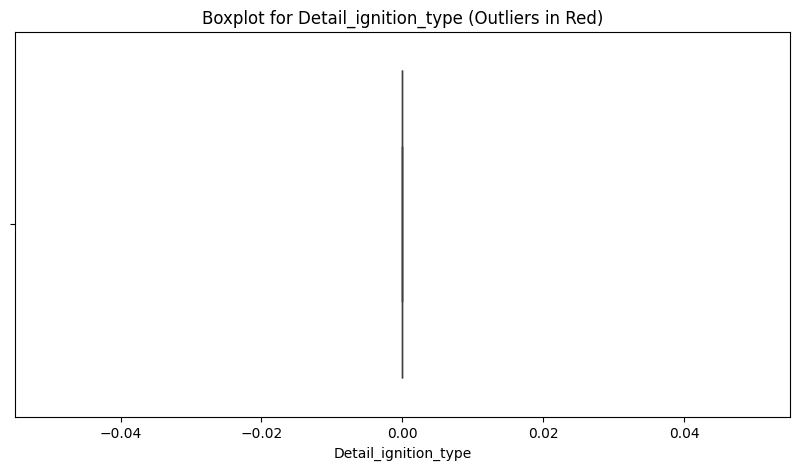

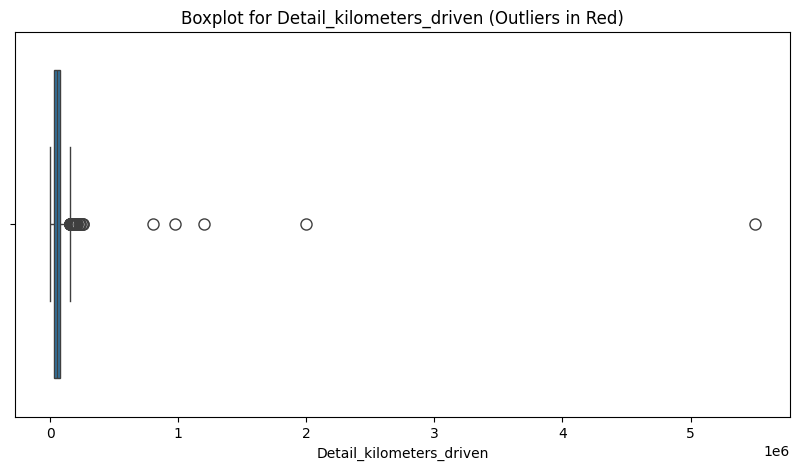

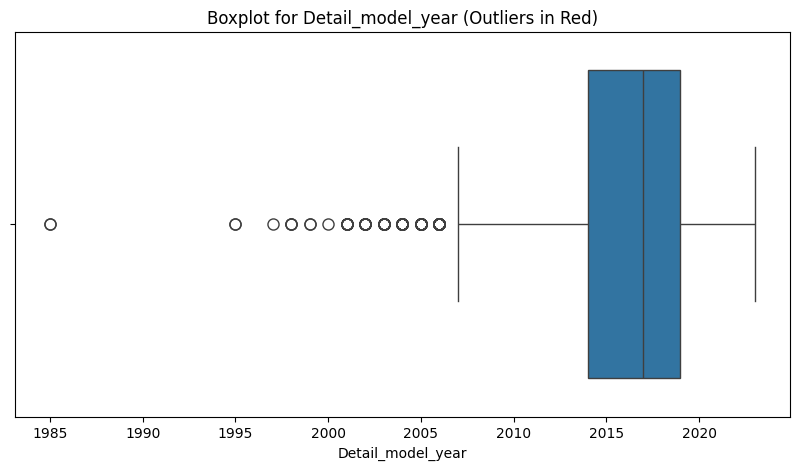

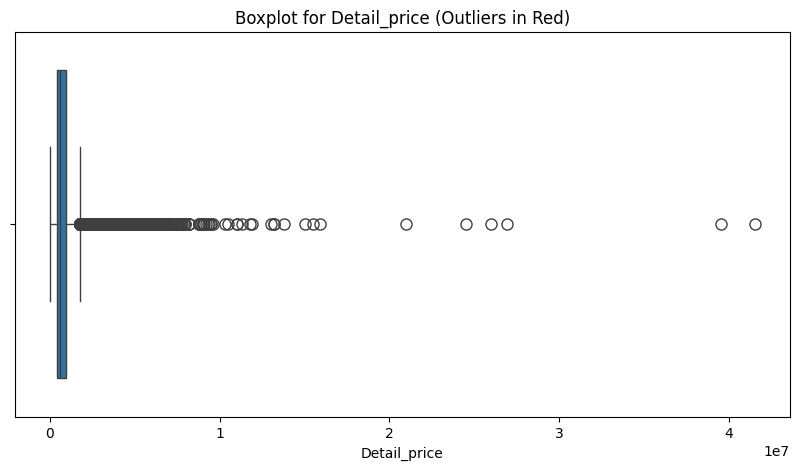

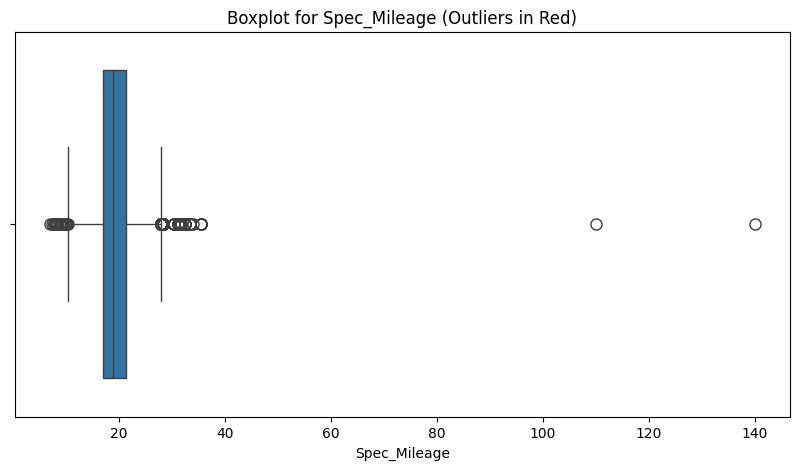

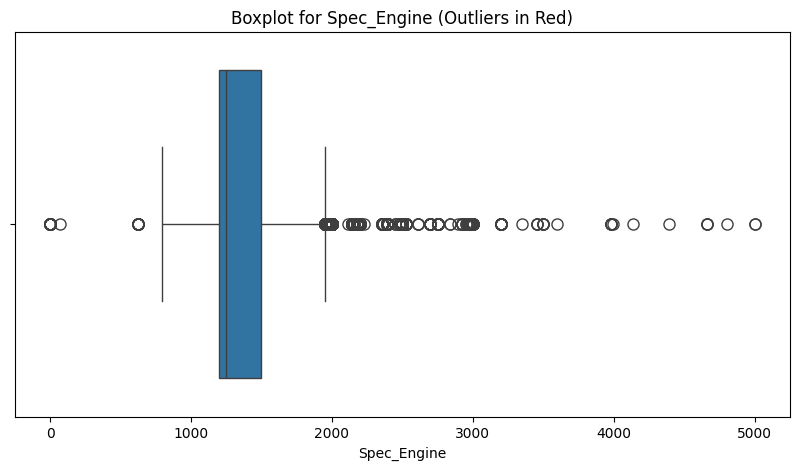

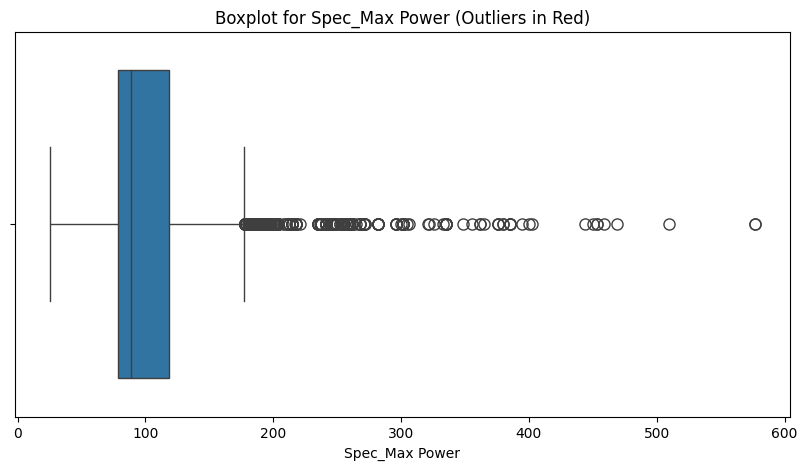

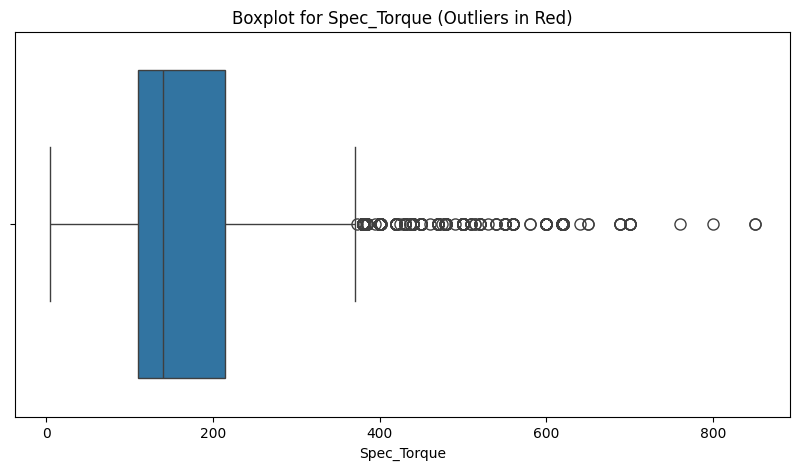

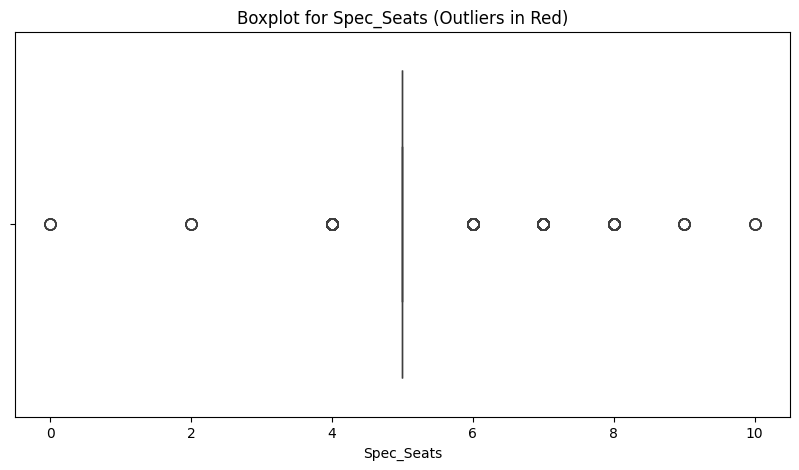

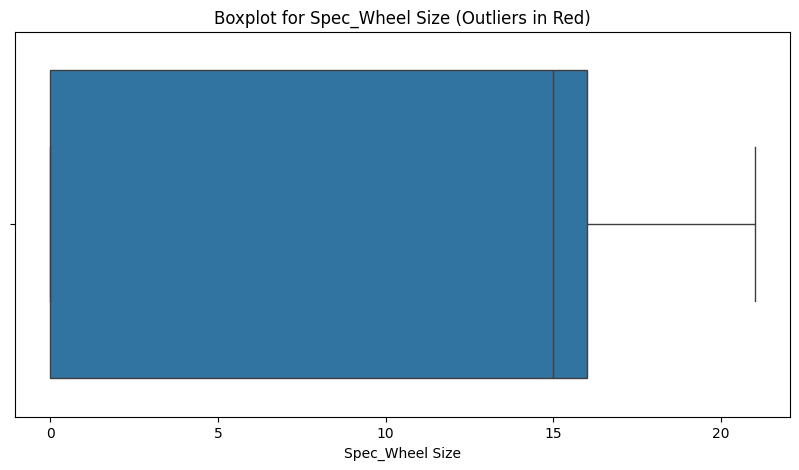

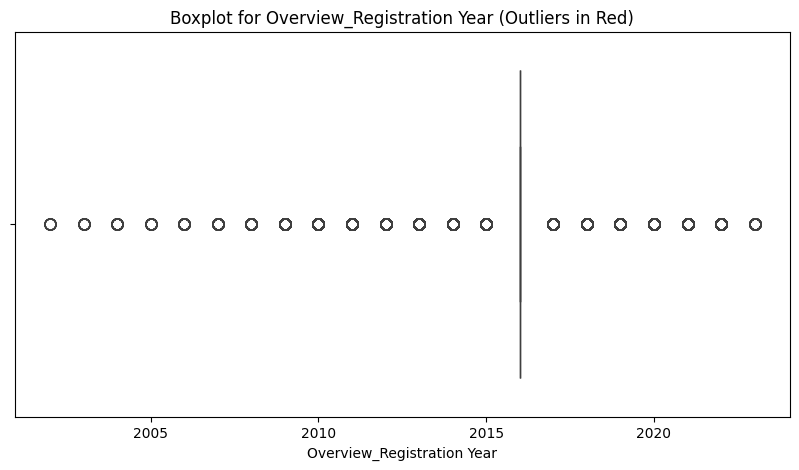

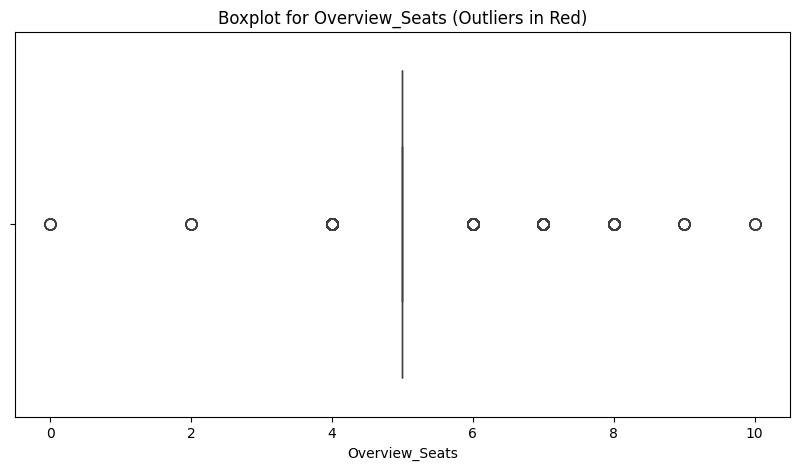

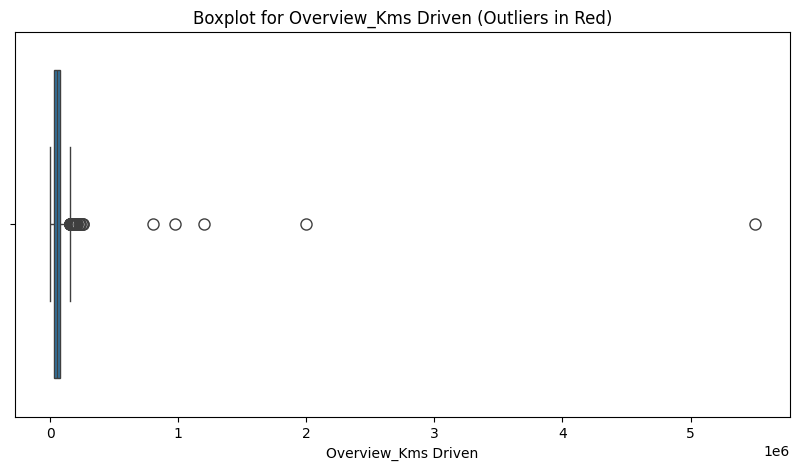

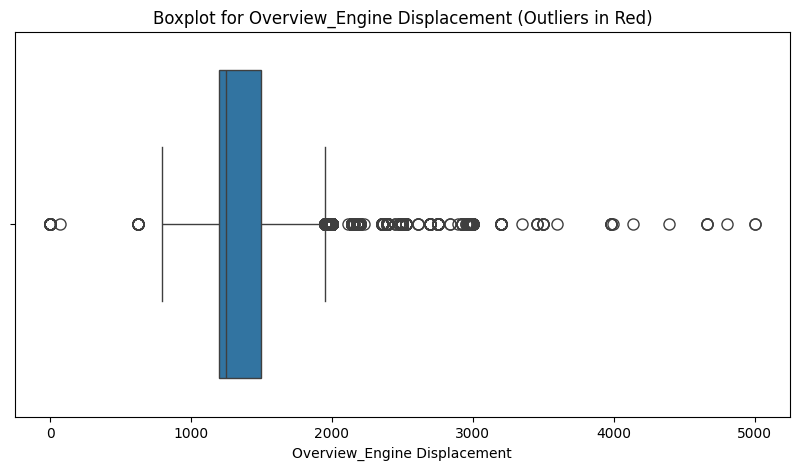

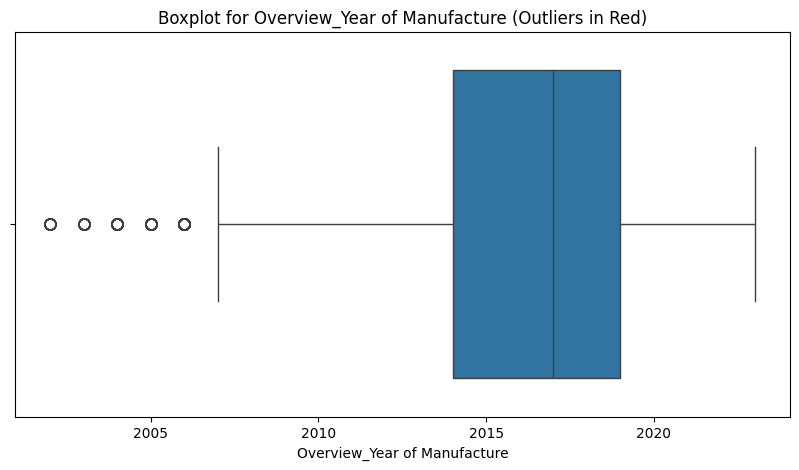

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify numerical columns
numerical_cols = final_df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Detect outliers using the IQR method
def detect_outliers_iqr(df, numerical_cols):
    """
    Detect outliers in numerical columns using the IQR method.
    """
    outliers = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and store outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        print(f"Column '{col}': Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    return outliers

# Step 3: Get outliers
outliers = detect_outliers_iqr(final_df, numerical_cols)

# Step 4: Visualize outliers using boxplots with differently colored points
def plot_boxplots_with_outliers(df, numerical_cols):
    """
    Visualize numerical columns using boxplots, highlighting outliers in a different color.
    """
    for col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=col, flierprops=dict(marker='o', color='red', markersize=8))  # Red color for outliers
        plt.title(f'Boxplot for {col} (Outliers in Red)')
        plt.show()

# Plot the boxplots with highlighted outliers
plot_boxplots_with_outliers(final_df, numerical_cols)

In [19]:
# Step 1: Identify numerical columns
numerical_cols = final_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_cols)

# Step 2: Define a combined function to handle outliers
def handle_outliers(df, numerical_cols, method='remove'):
    """
    Handle outliers in the dataset using the IQR method.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        numerical_cols (list): List of numerical columns to check for outliers.
        method (str): 'remove' to delete rows with outliers, 'cap' to adjust outliers to boundary values.

    Returns:
        pd.DataFrame: The dataframe with outliers handled.
    """
    cleaned_data = df.copy()
    for col in numerical_cols:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == 'remove':
            # Remove rows where outliers are present
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
        elif method == 'cap':
            # Cap outliers to the nearest boundary value
            cleaned_data[col] = cleaned_data[col].clip(lower=lower_bound, upper=upper_bound)
        else:
            raise ValueError("Invalid method. Use 'remove' or 'cap'.")

    return cleaned_data

# Step 3: Handle outliers
# Option 1: Remove rows with outliers
cleaned_data_remove = handle_outliers(final_df, numerical_cols, method='remove')
print("\nData cleaned by removing outliers:\n", cleaned_data_remove)

# Option 2: Cap outliers
cleaned_data_cap = handle_outliers(final_df, numerical_cols, method='cap')
print("\nData cleaned by capping outliers:\n", cleaned_data_cap)

# Step 4: Save cleaned data to Excel files (Optional)
cleaned_data_remove.to_excel('Cleaned_Data_Removed_Outliers.xlsx', index=False)
cleaned_data_cap.to_excel('Cleaned_Data_Capped_Outliers.xlsx', index=False)

Numerical Columns: Index(['Detail_ignition_type', 'Detail_kilometers_driven', 'Detail_model_year',
       'Detail_price', 'Spec_Mileage', 'Spec_Engine', 'Spec_Max Power',
       'Spec_Torque', 'Spec_Seats', 'Spec_Wheel Size',
       'Overview_Registration Year', 'Overview_Seats', 'Overview_Kms Driven',
       'Overview_Engine Displacement', 'Overview_Year of Manufacture'],
      dtype='object')

Data cleaned by removing outliers:
                                               car_links       City  \
1     https://www.cardekho.com/buy-used-car-details/...  Bangalore   
2     https://www.cardekho.com/used-car-details/used...  Bangalore   
3     https://www.cardekho.com/buy-used-car-details/...  Bangalore   
6     https://www.cardekho.com/buy-used-car-details/...  Bangalore   
8     https://www.cardekho.com/used-car-details/used...  Bangalore   
...                                                 ...        ...   
8305  https://www.cardekho.com/used-car-details/used...    Kolkata   
8306 

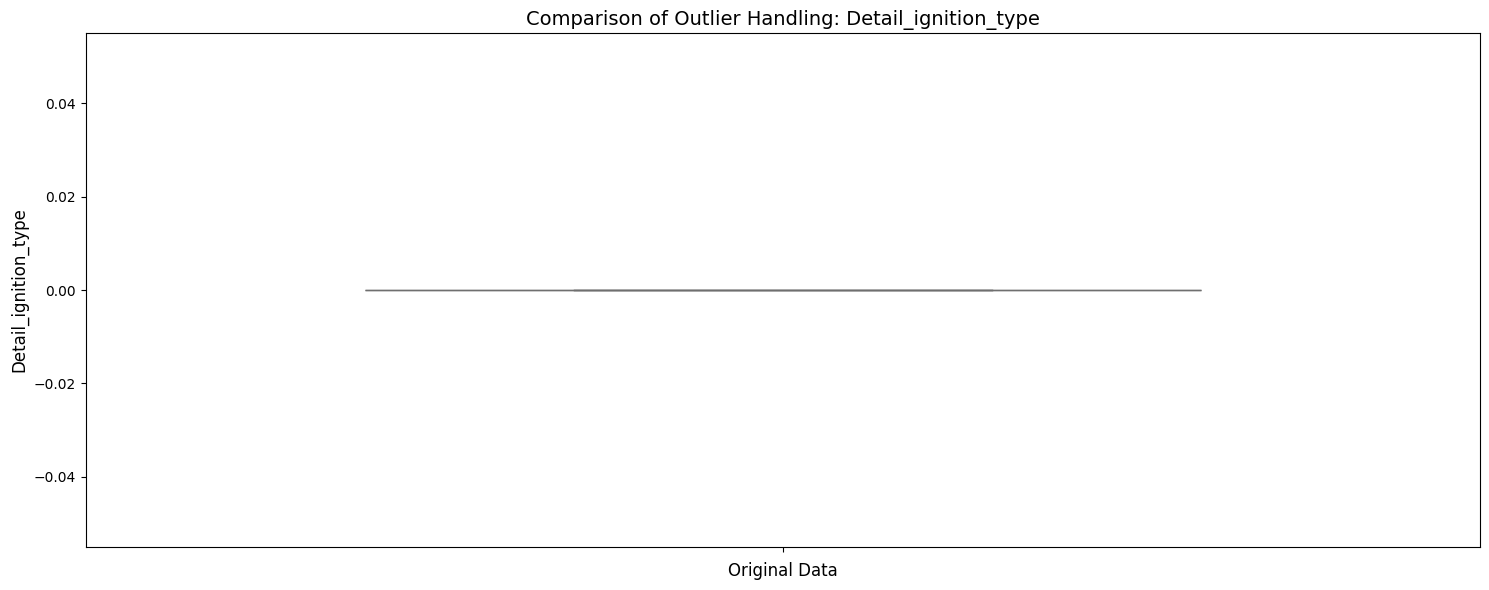

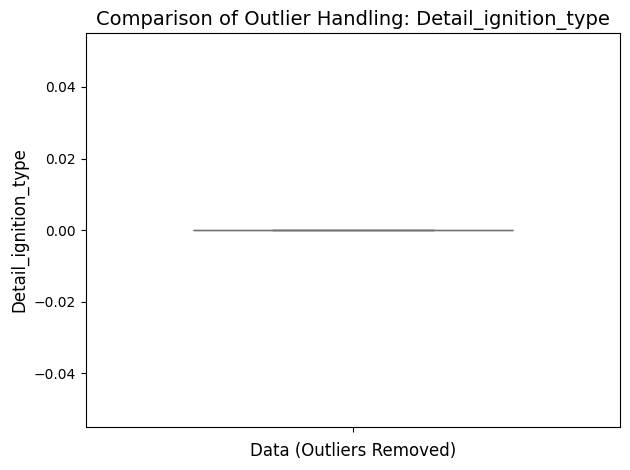

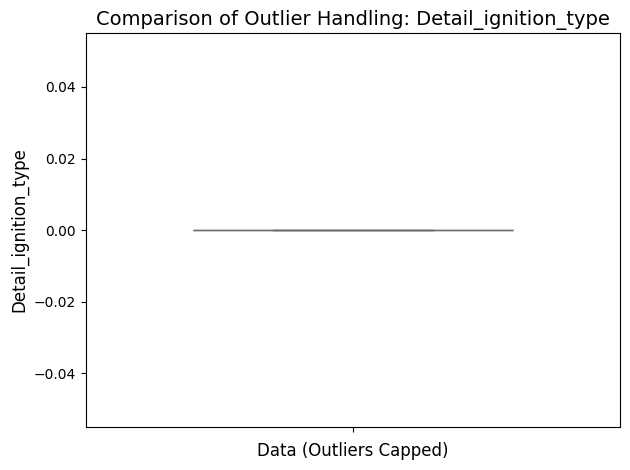

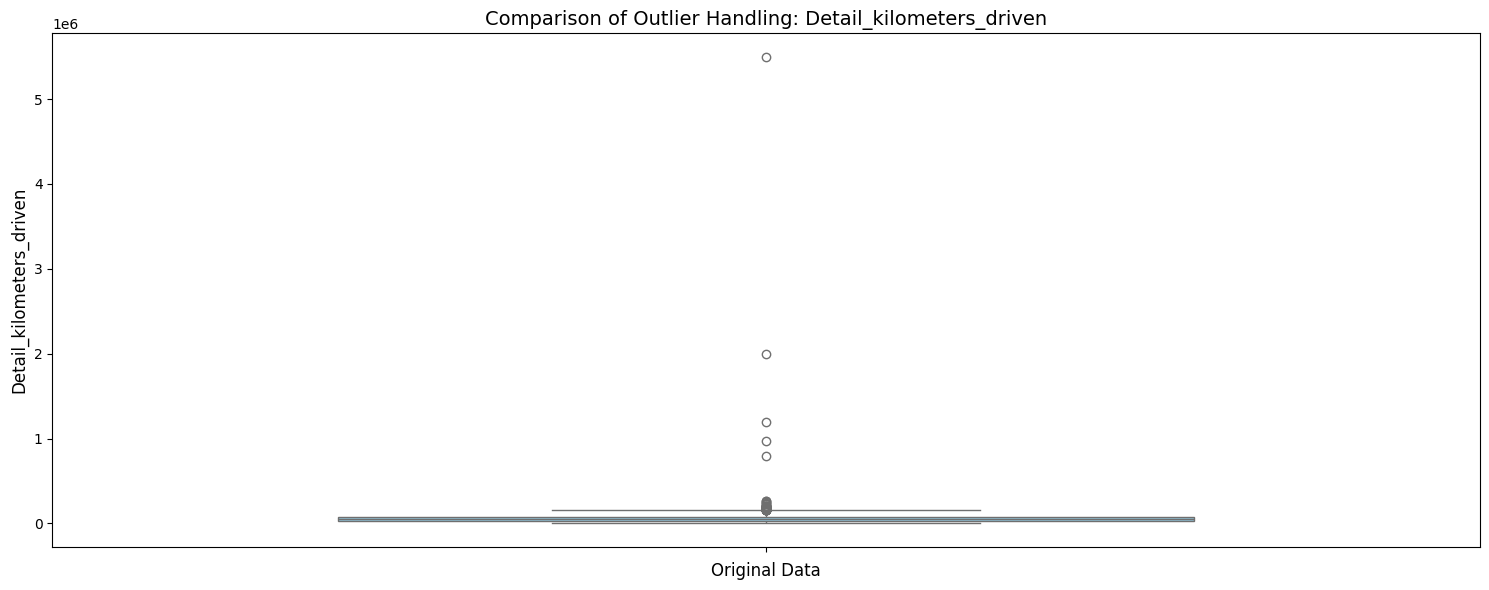

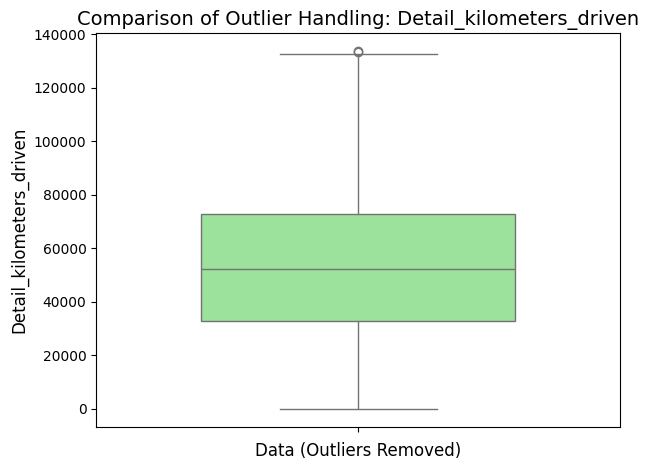

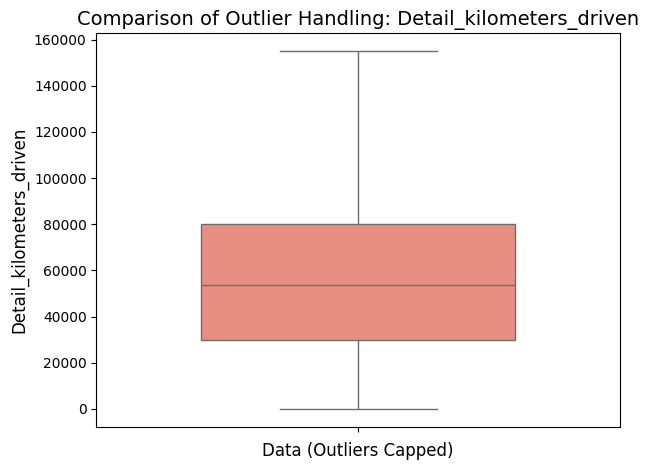

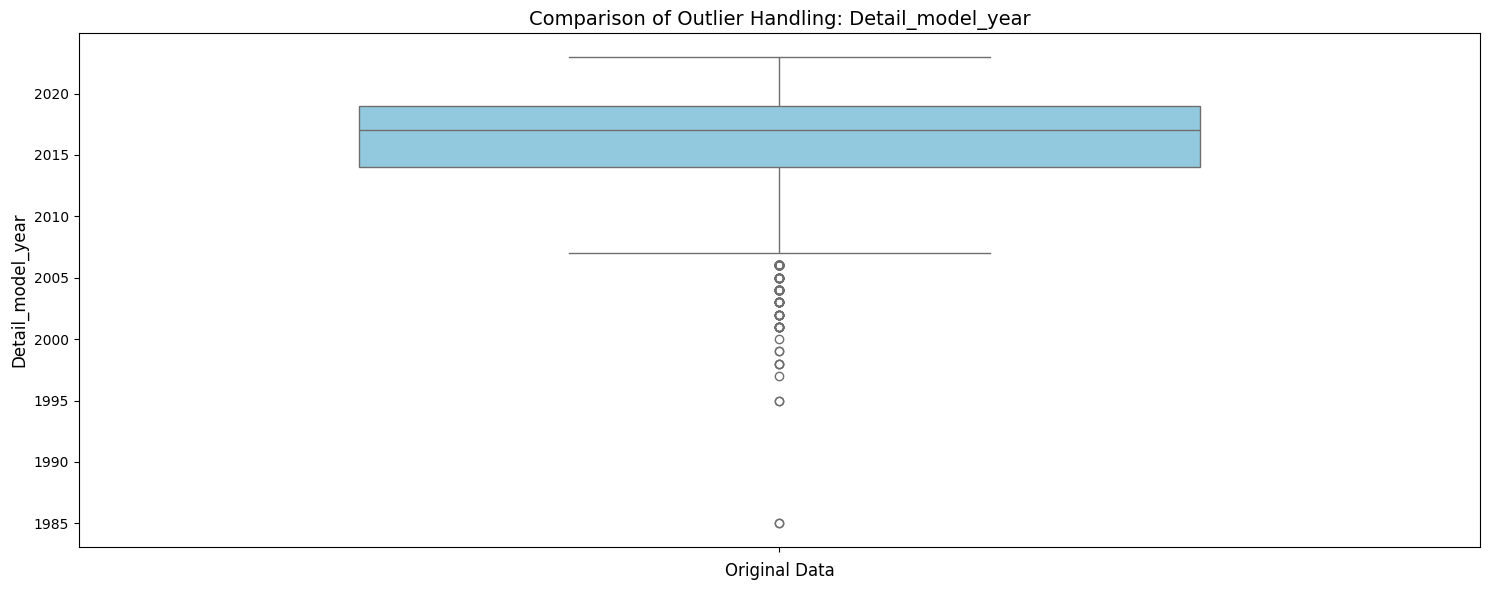

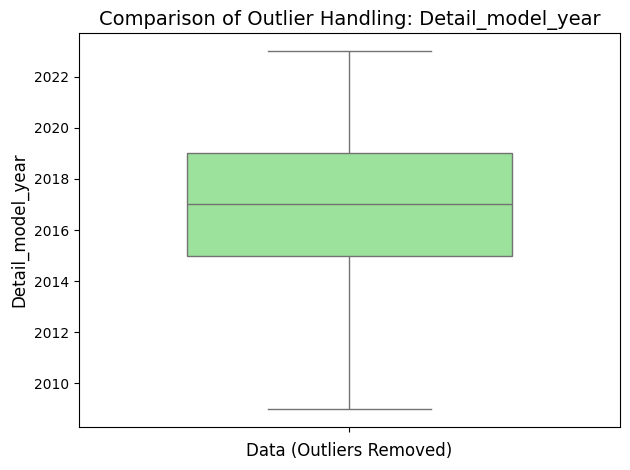

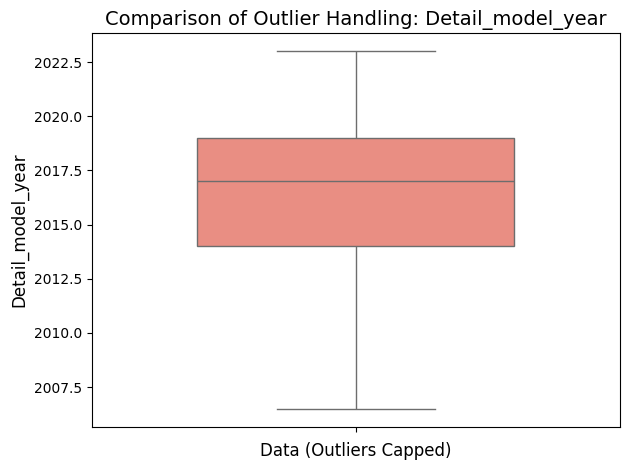

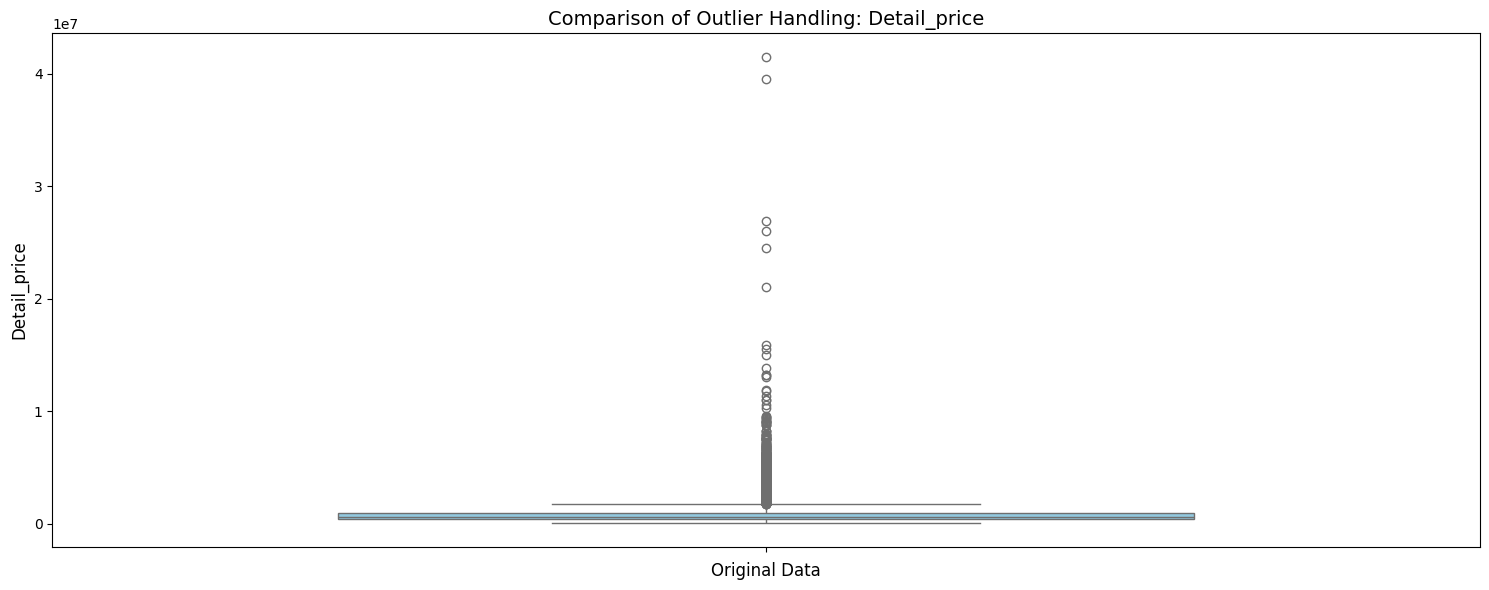

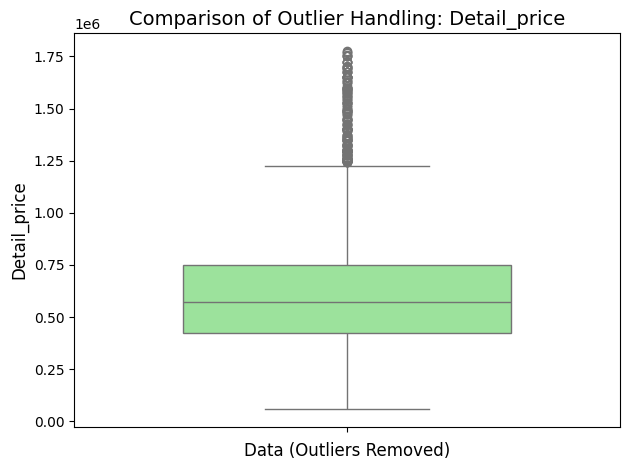

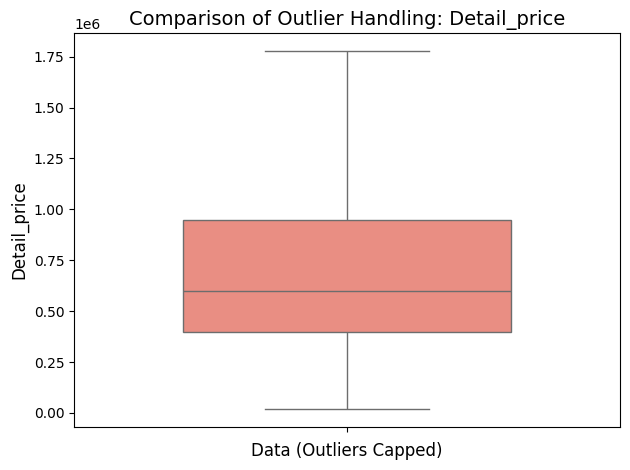

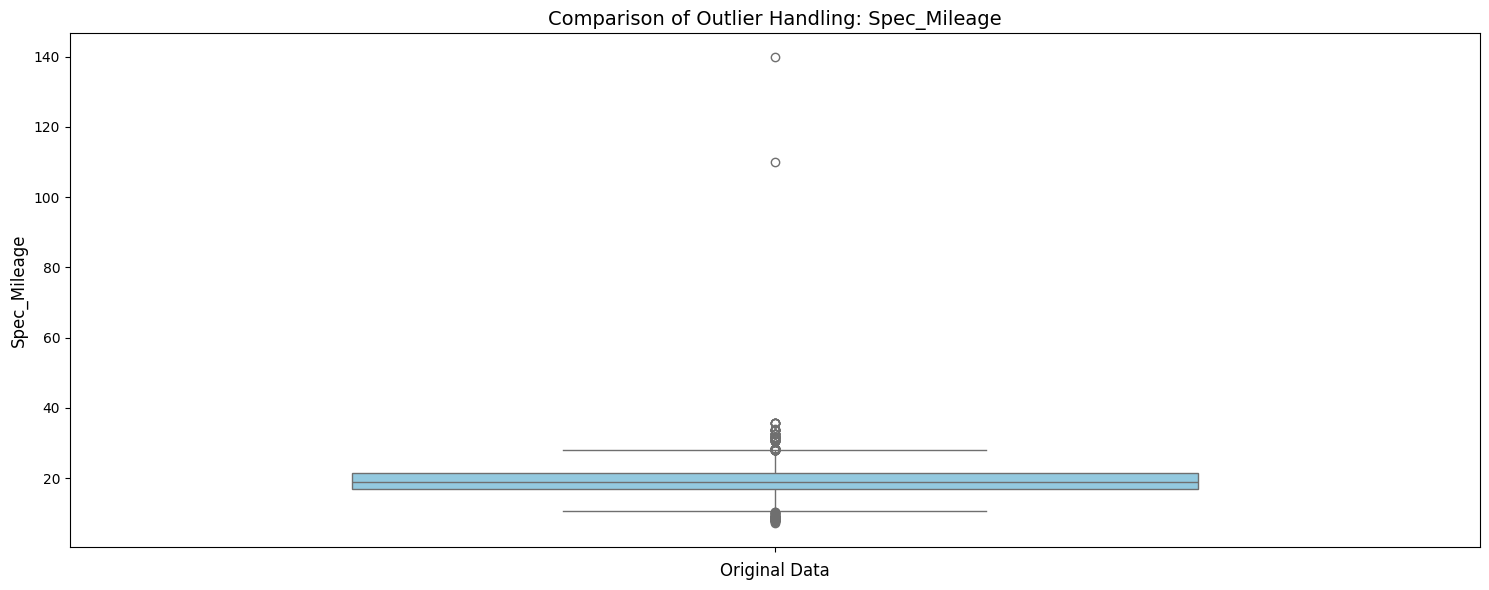

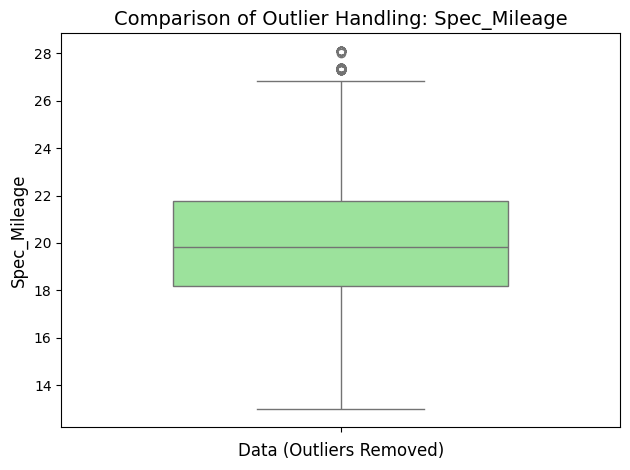

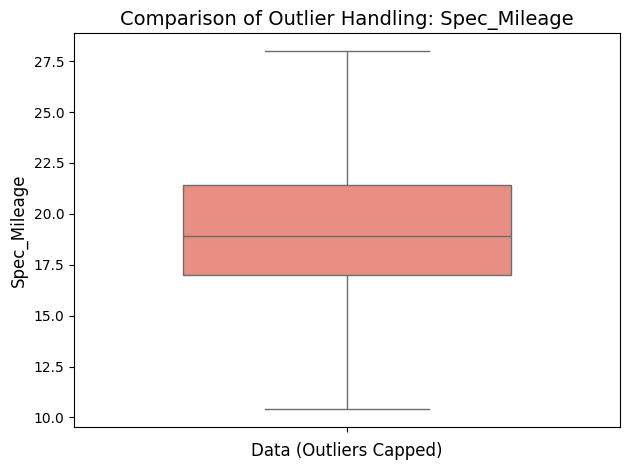

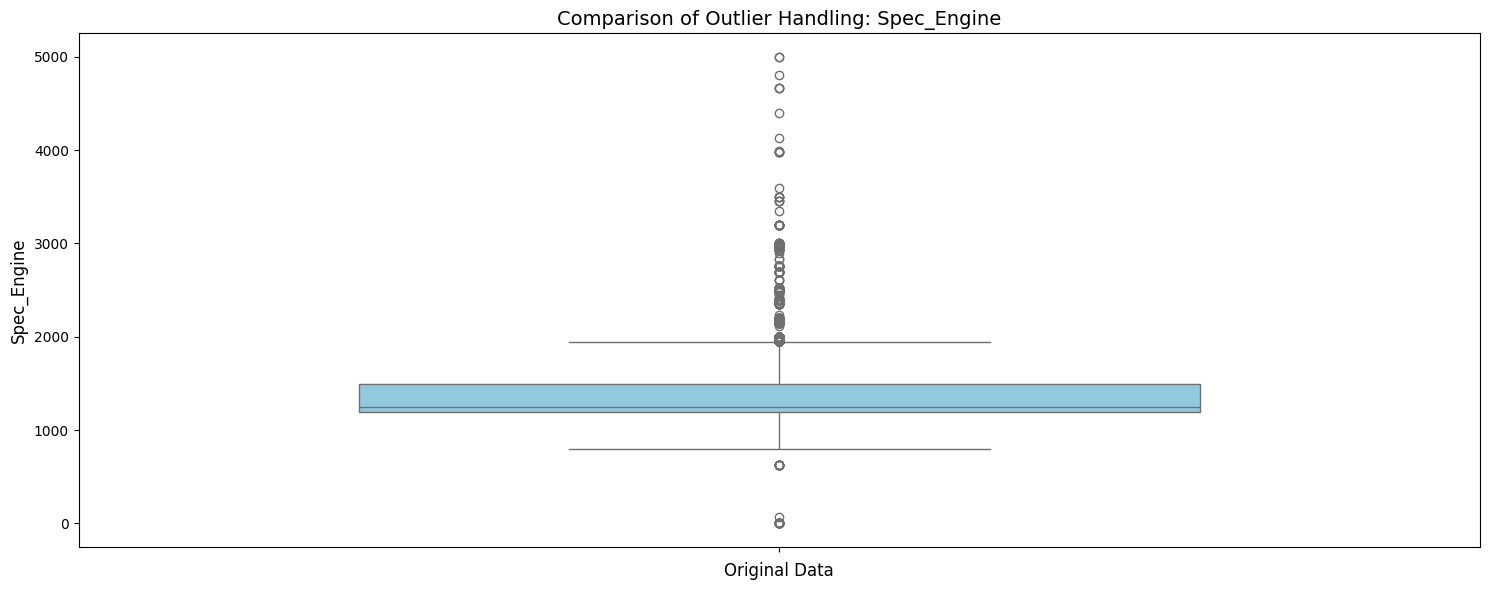

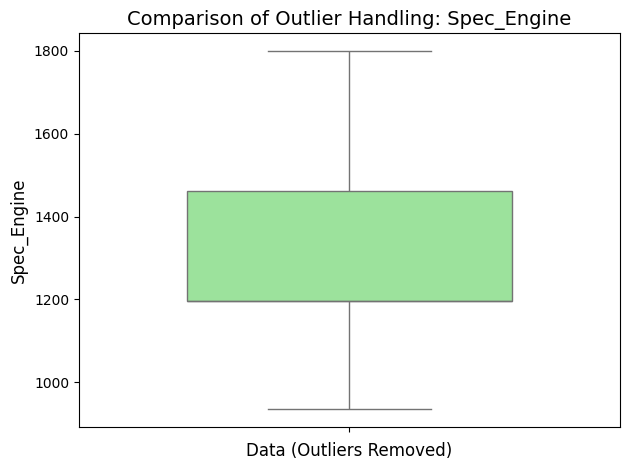

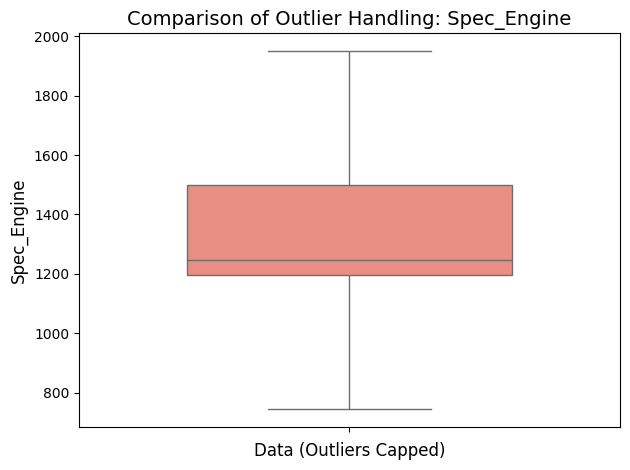

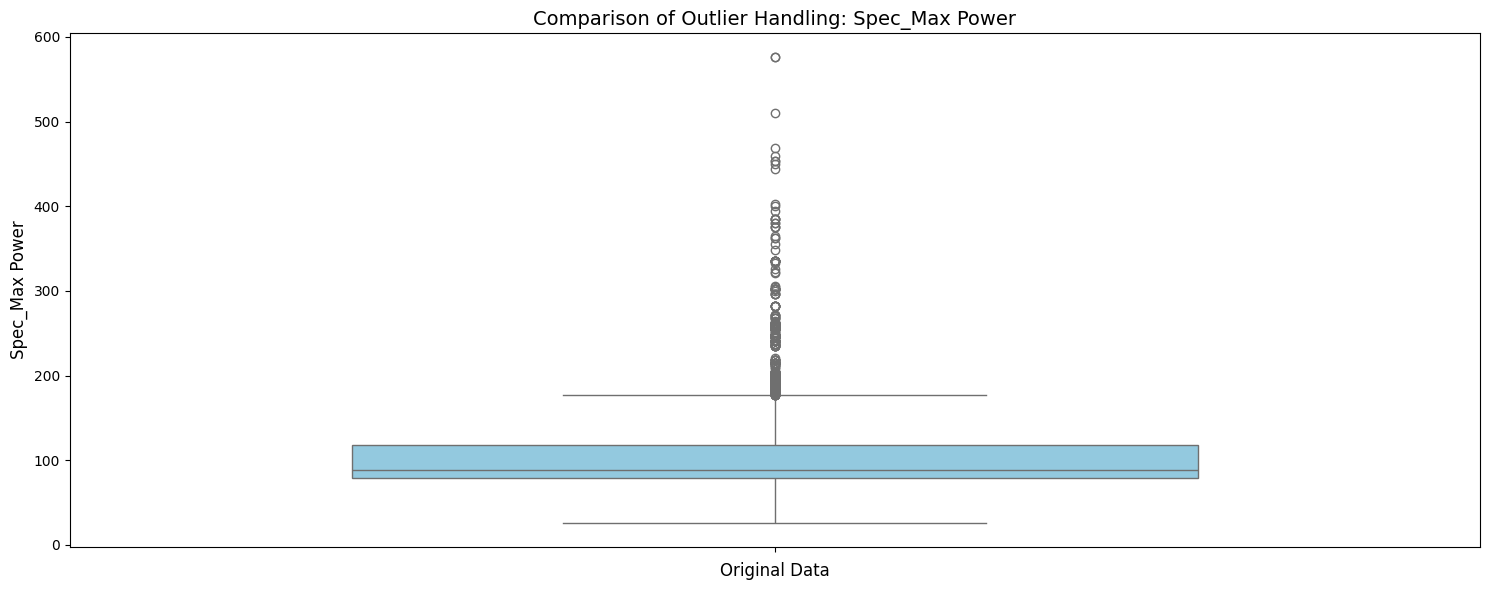

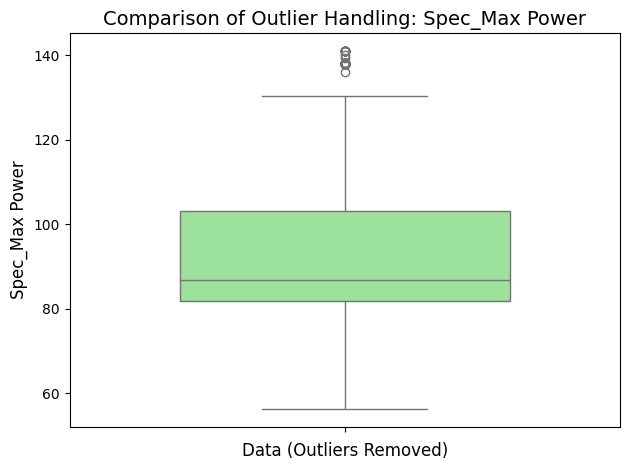

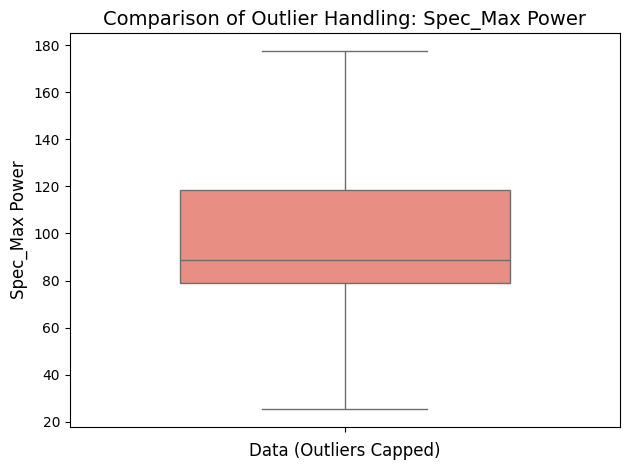

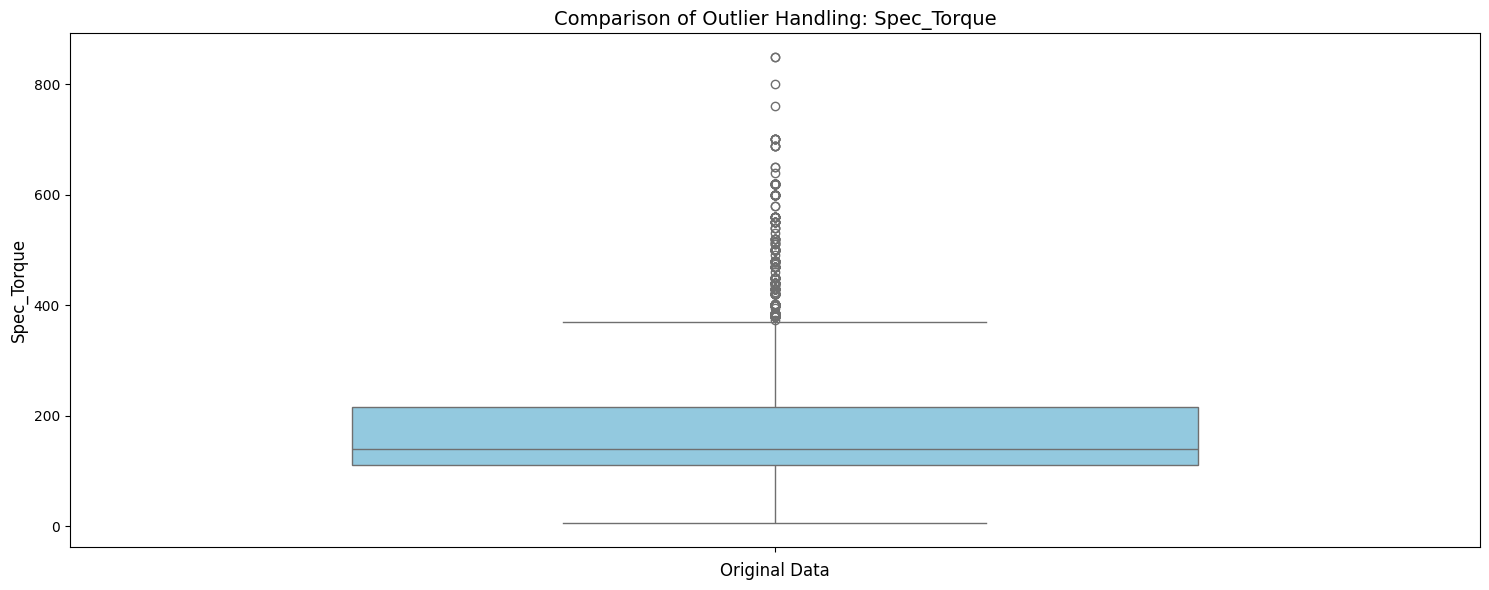

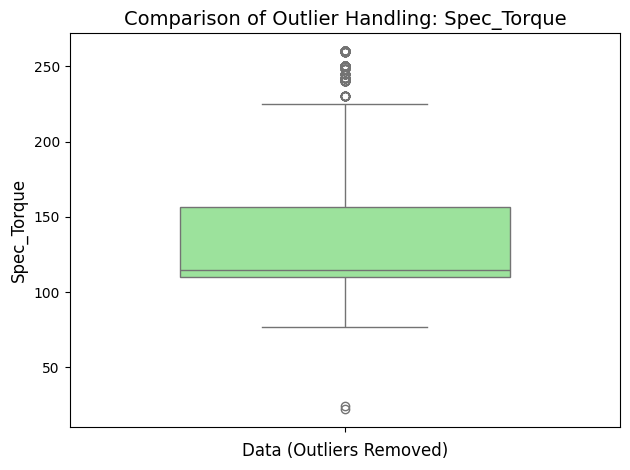

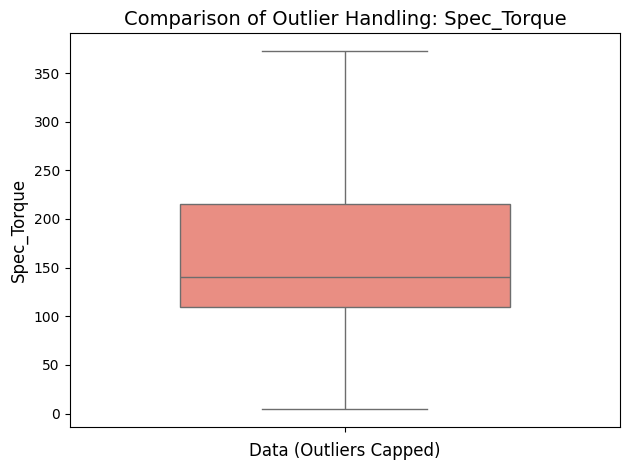

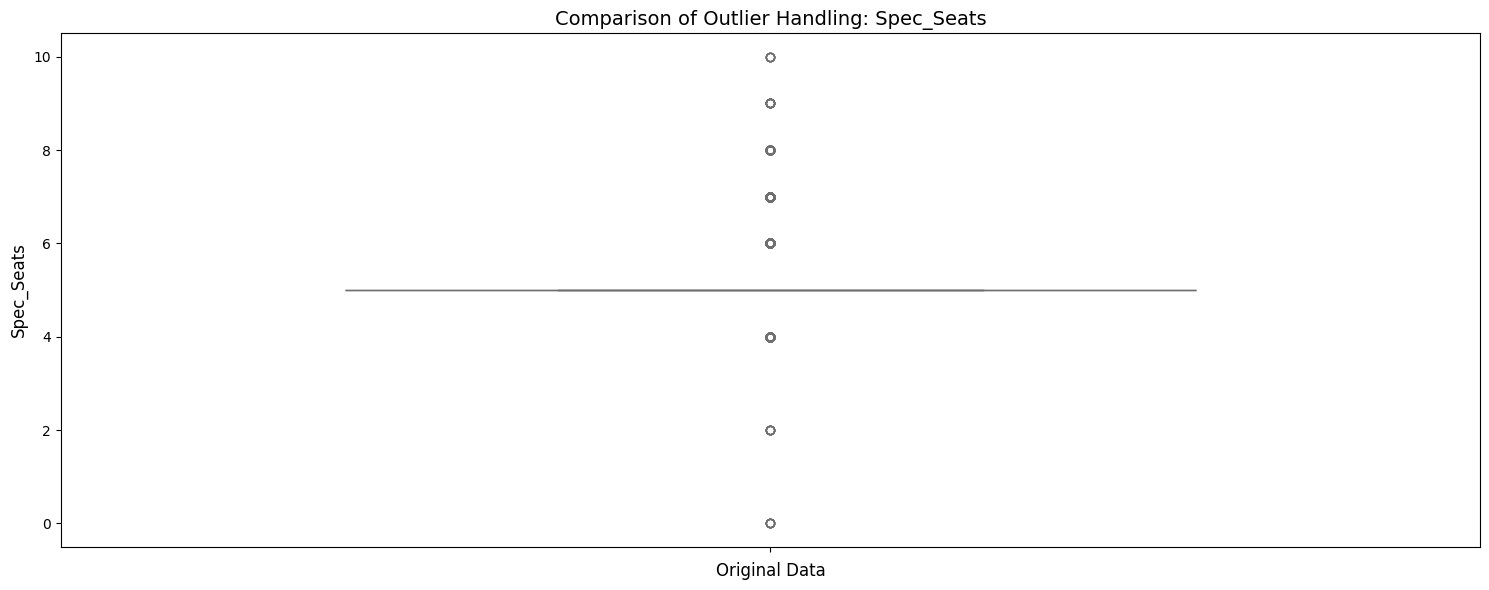

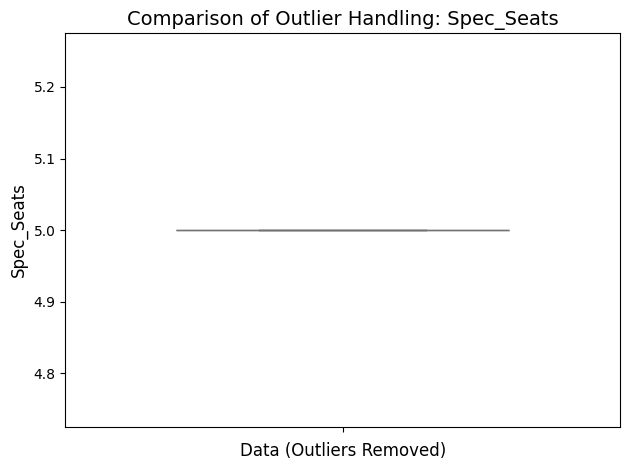

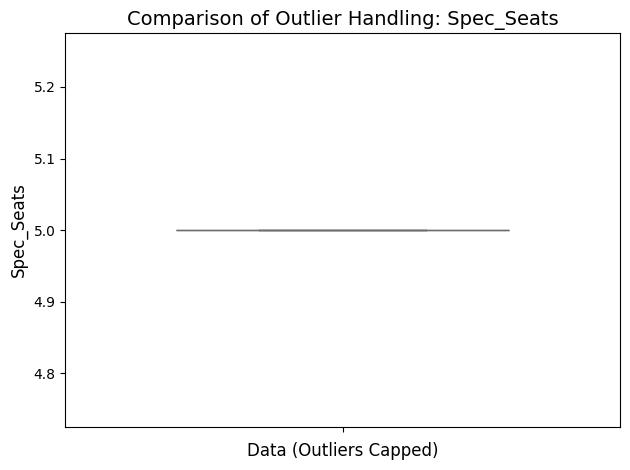

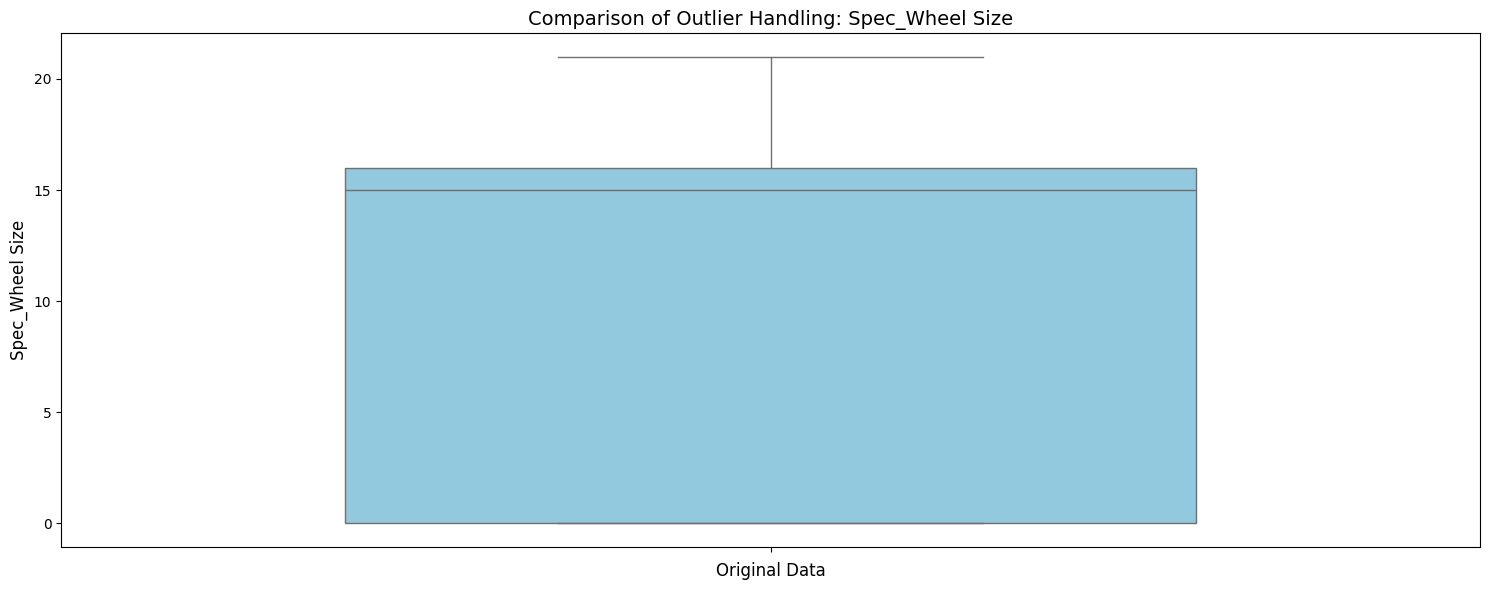

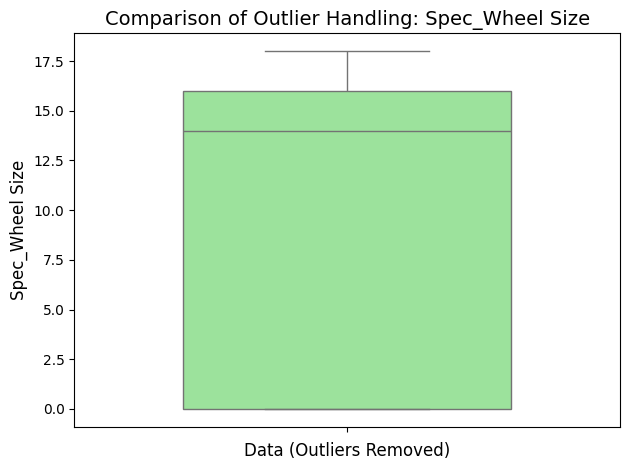

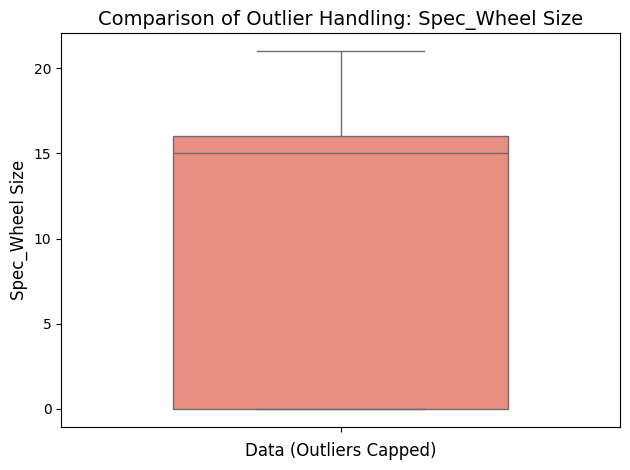

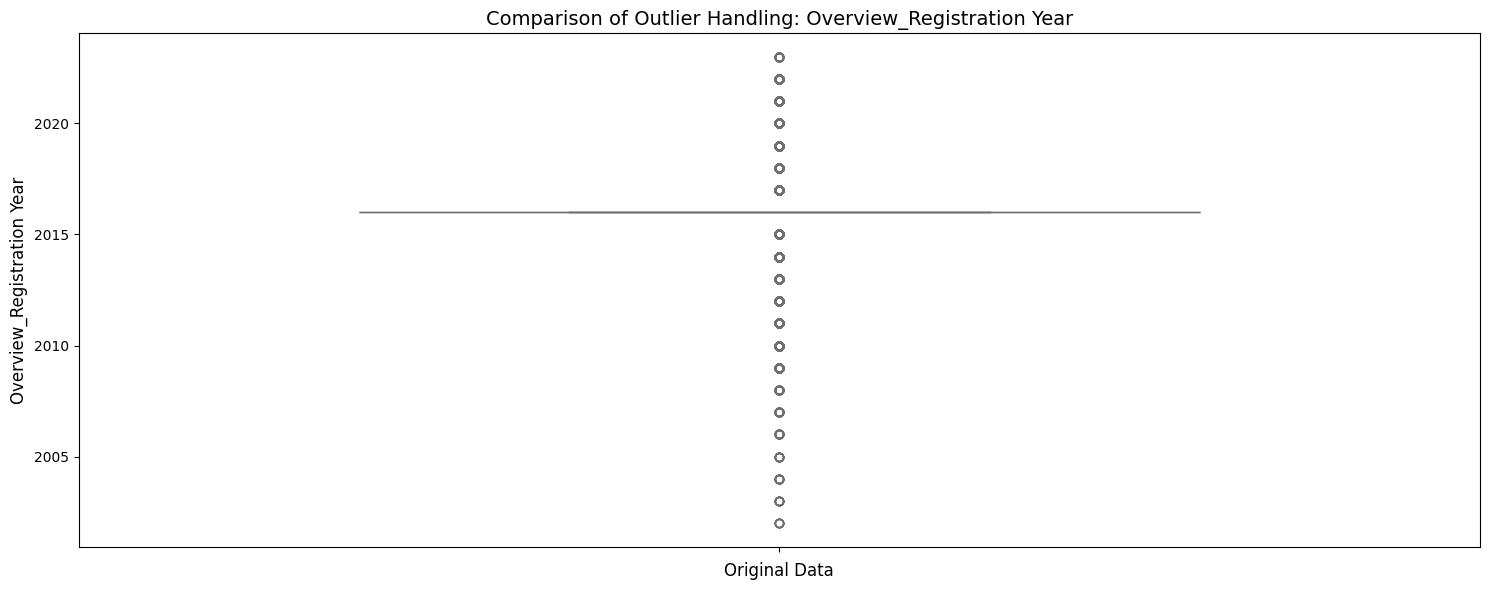

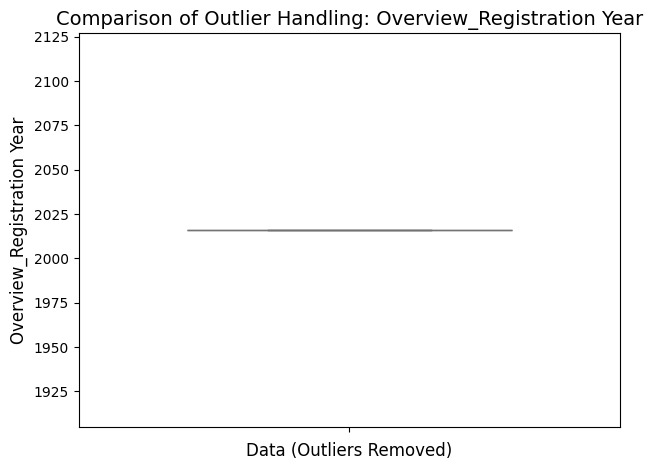

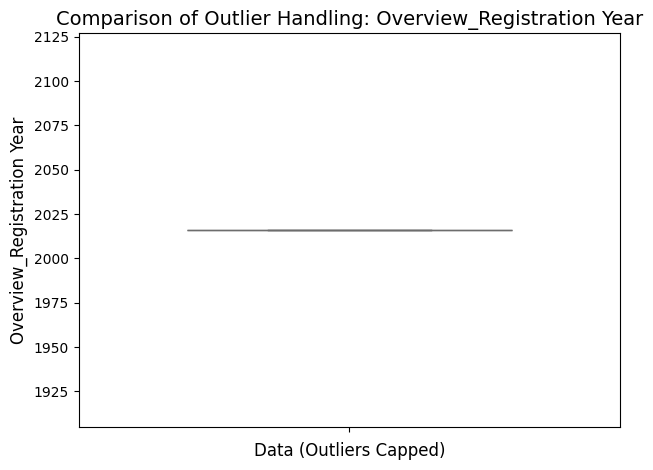

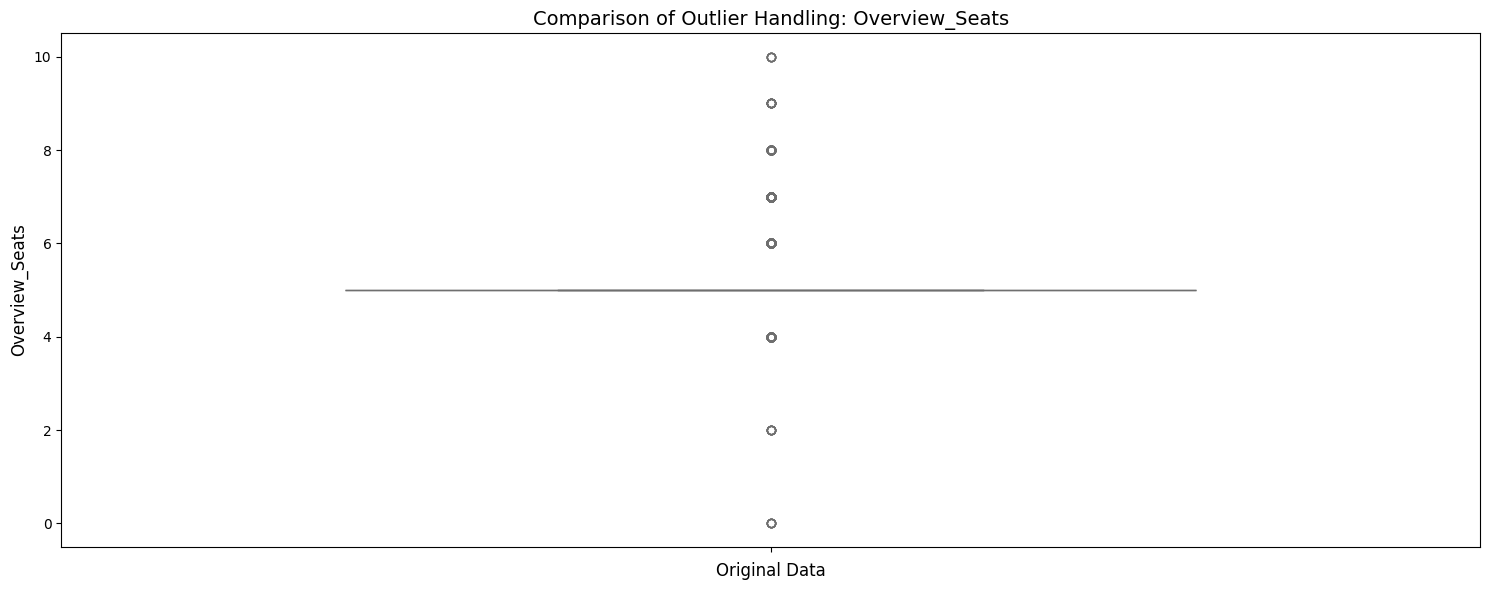

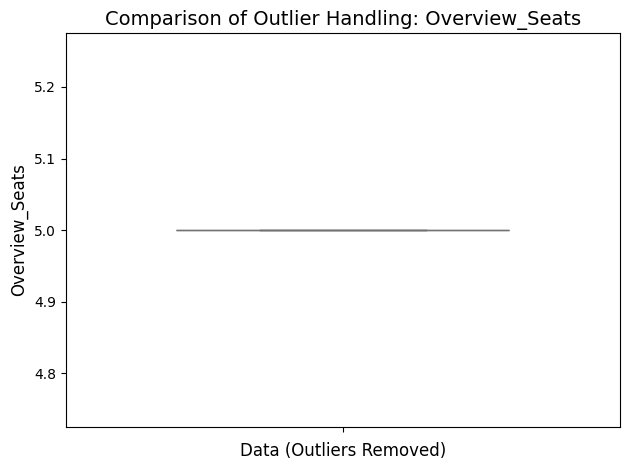

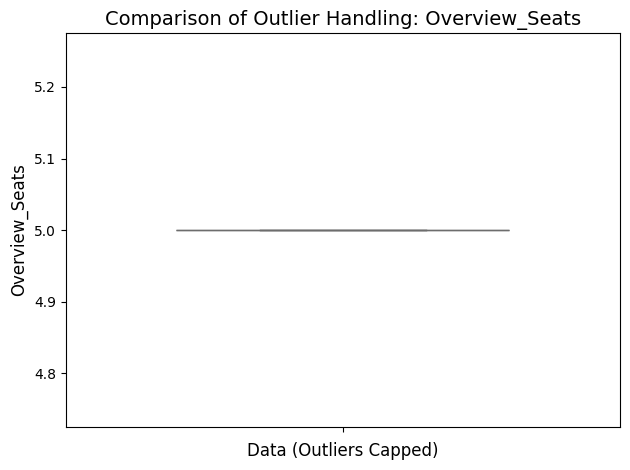

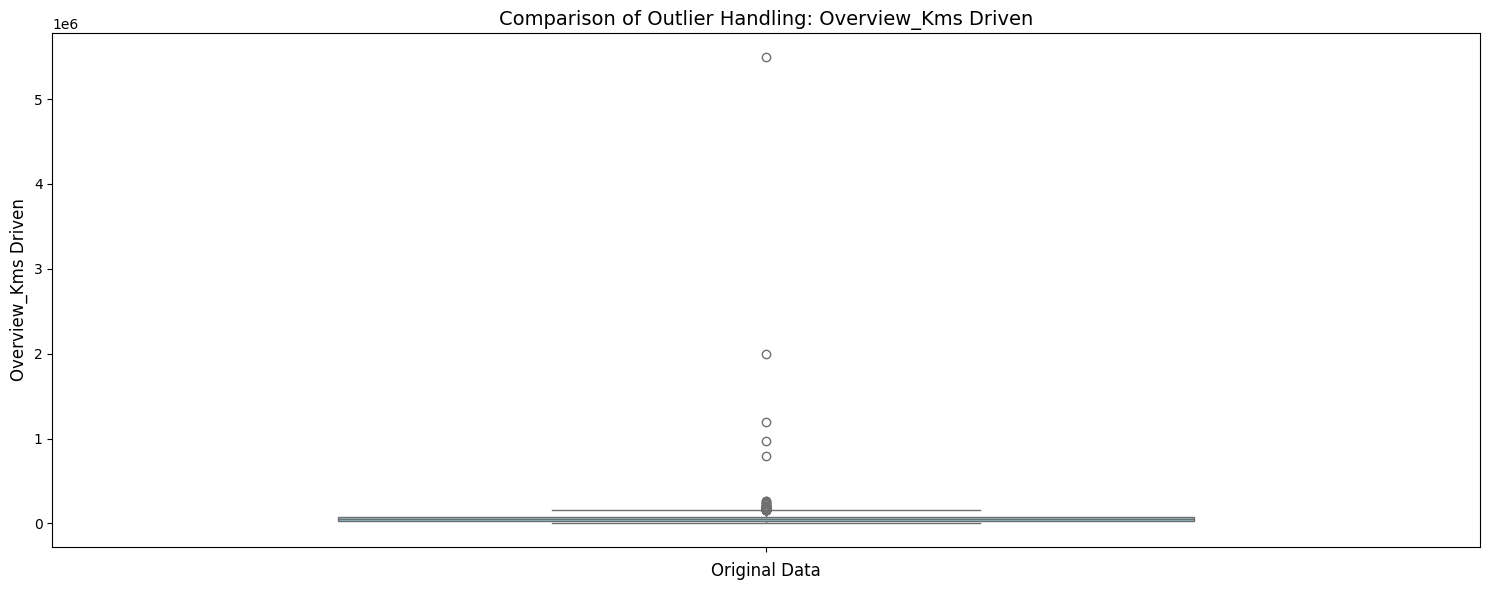

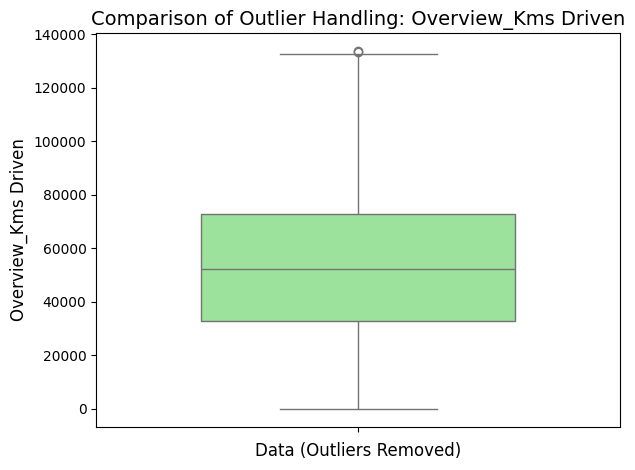

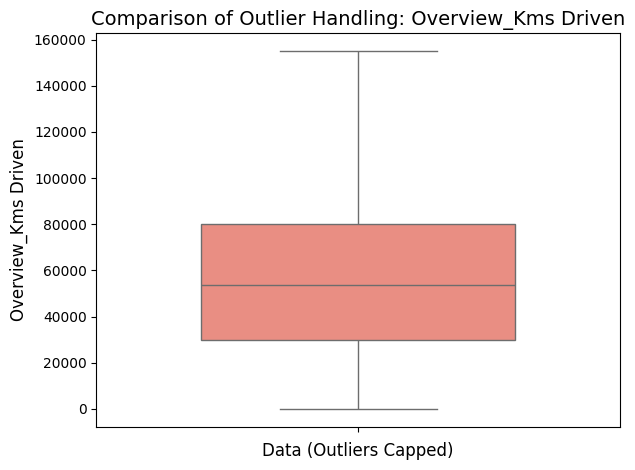

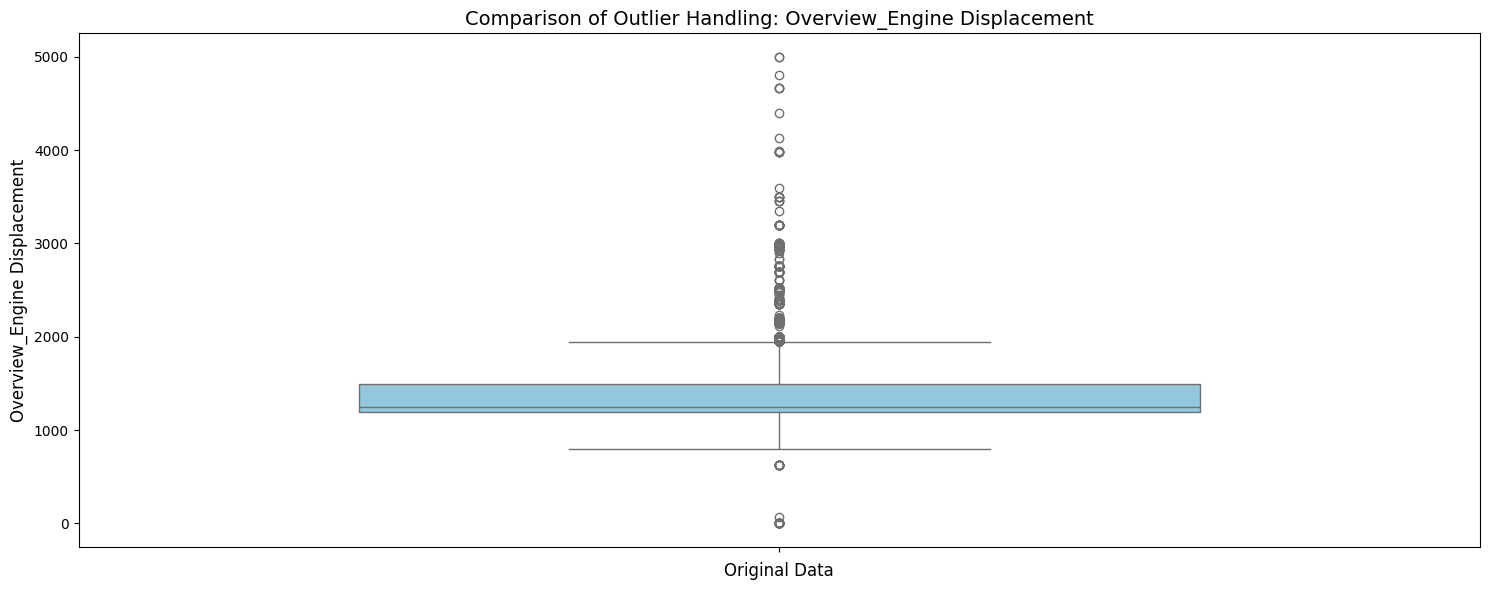

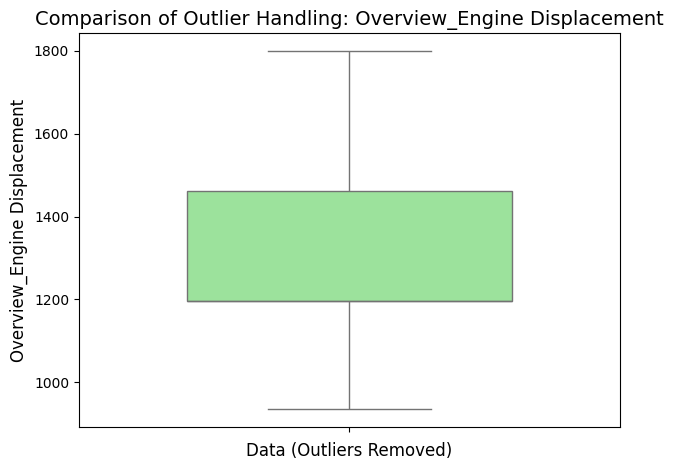

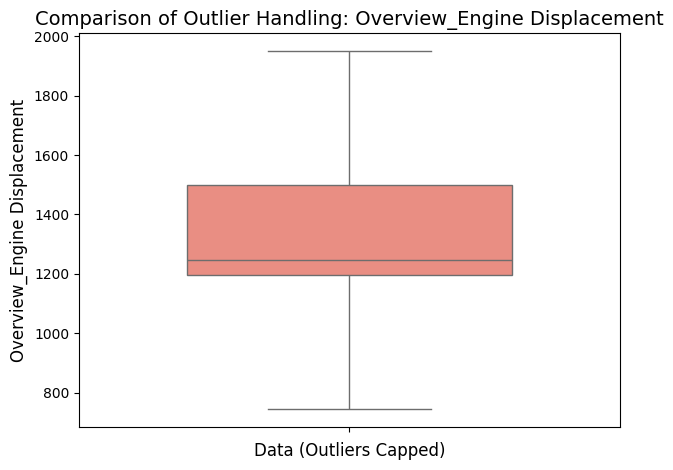

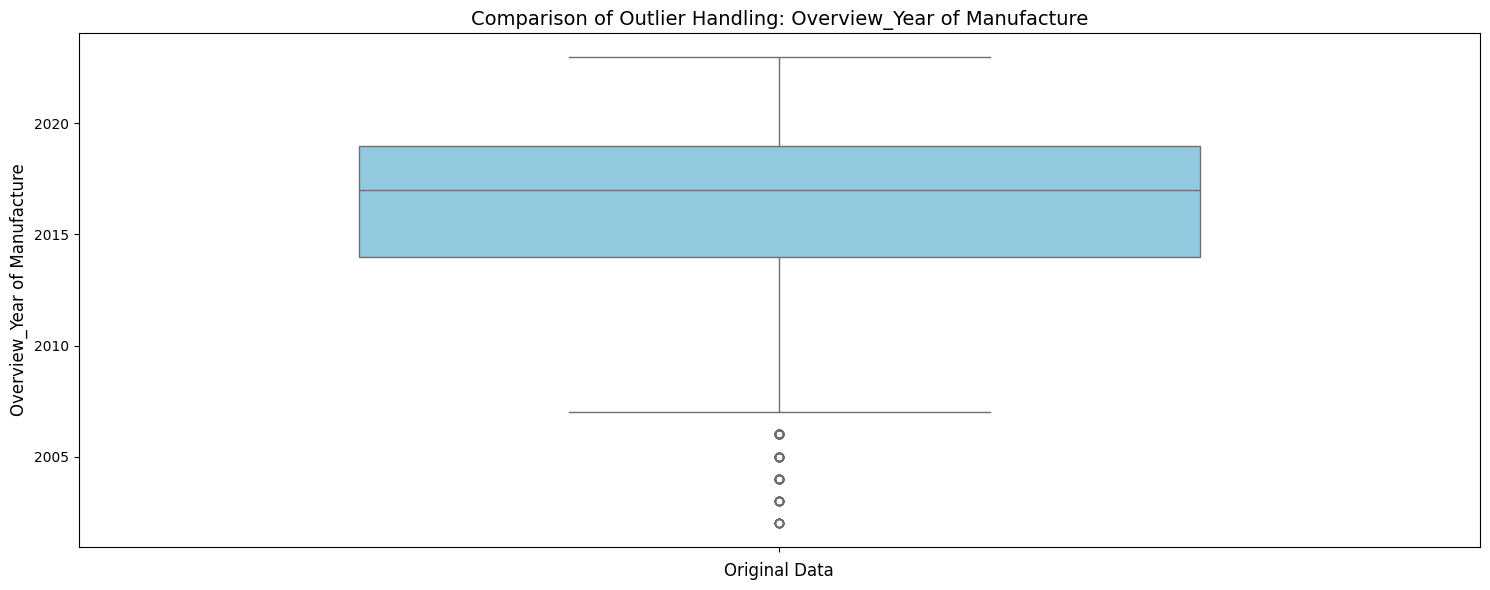

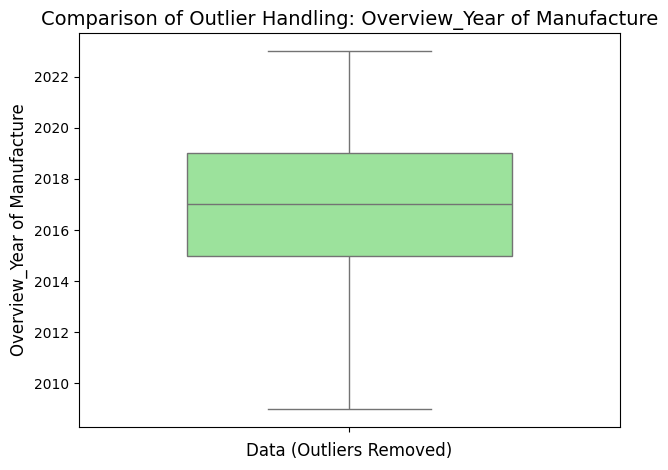

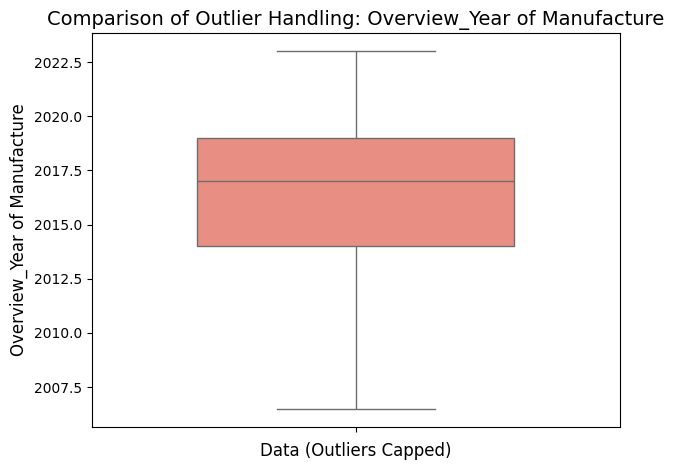

In [20]:
def plot_boxplots(df_list, labels, colors, numerical_cols, title):
    """
    Plot boxplots for multiple dataframes side by side with different colors.

    Parameters:
        df_list (list): List of DataFrames to visualize.
        labels (list): Labels for the datasets.
        colors (list): Colors for the boxplots.
        numerical_cols (list): List of numerical columns.
        title (str): Overall title for the plots.
    """
    for col in numerical_cols:
        plt.figure(figsize=(15, 6))
        for i, df in enumerate(df_list):
            sns.boxplot(data=df, y=col, color=colors[i], width=0.6)
            plt.title(f'{title}: {col}', fontsize=14)
            plt.xlabel(labels[i], fontsize=12)
            plt.ylabel(col, fontsize=12)
            plt.tight_layout()
            plt.show()

# Prepare data for visualization
datasets = [final_df, cleaned_data_remove, cleaned_data_cap]
labels = ['Original Data', 'Data (Outliers Removed)', 'Data (Outliers Capped)']
colors = ['skyblue', 'lightgreen', 'salmon']

# Plot boxplots for each dataset
plot_boxplots(datasets, labels, colors, numerical_cols, title="Comparison of Outlier Handling")

**EDA PROCESS**

In [21]:
# Get a statistical summary of numerical columns
print("\nStatistical Summary (Numerical Data):")
print(final_df.describe())

# For categorical data, you can get the count of unique values:
print("\nUnique values in each column (for categorical columns):")
print(final_df.describe(include=['object']))



Statistical Summary (Numerical Data):
       Detail_ignition_type  Detail_kilometers_driven  Detail_model_year  \
count                8369.0              8.369000e+03        8369.000000   
mean                    0.0              5.897430e+04        2016.503286   
std                     0.0              7.406100e+04           3.921465   
min                     0.0              0.000000e+00        1985.000000   
25%                     0.0              3.000000e+04        2014.000000   
50%                     0.0              5.369200e+04        2017.000000   
75%                     0.0              8.000000e+04        2019.000000   
max                     0.0              5.500000e+06        2023.000000   

       Detail_price  Spec_Mileage  Spec_Engine  Spec_Max Power  Spec_Torque  \
count  8.369000e+03    8369.00000  8369.000000     8369.000000  8369.000000   
mean   9.569037e+05      19.24365  1424.054965      105.080533   177.553205   
std    1.416203e+06       3.96145   478

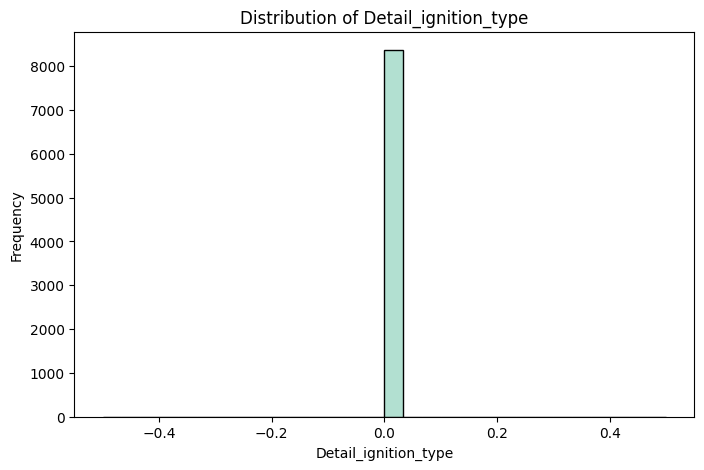

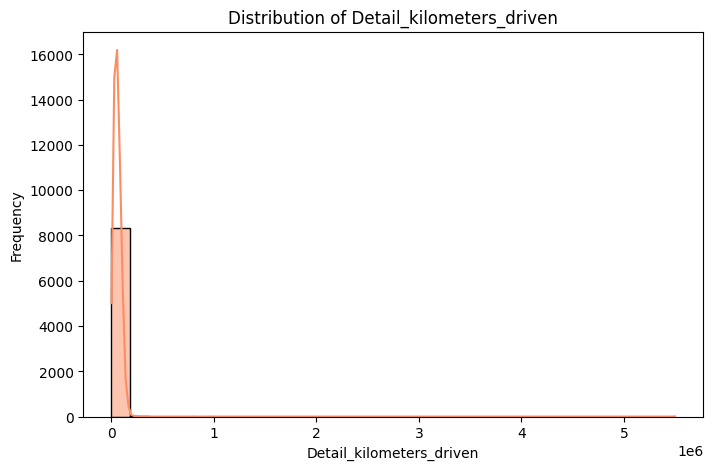

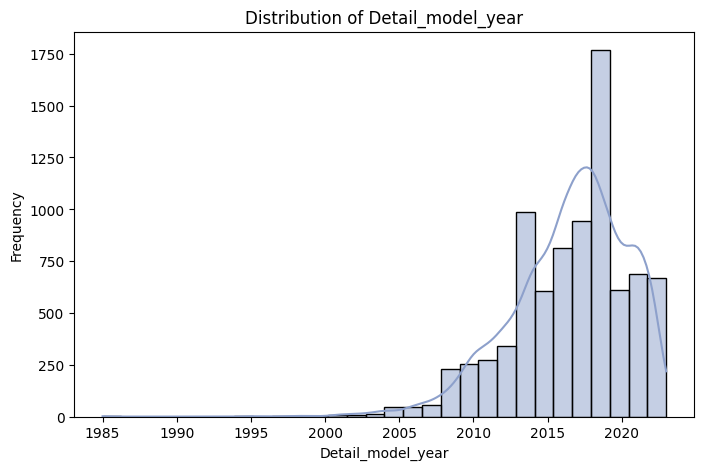

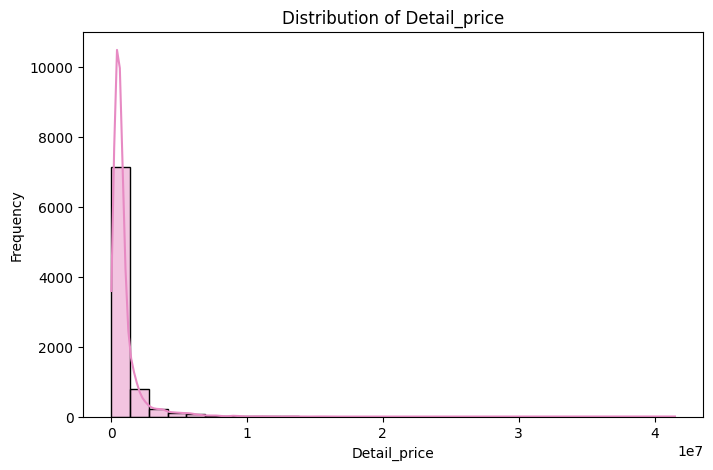

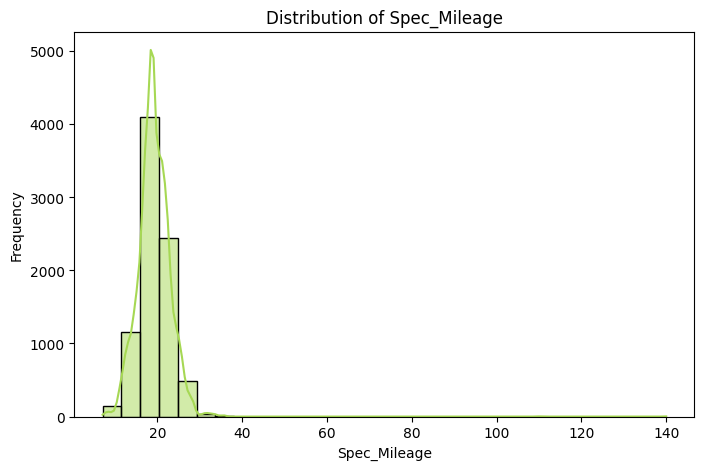

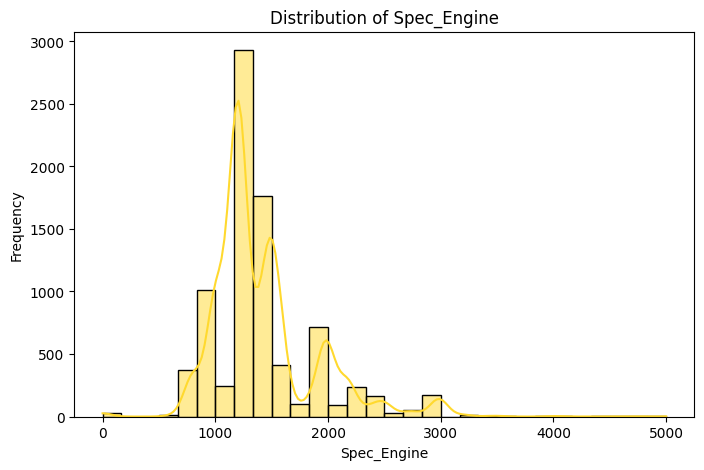

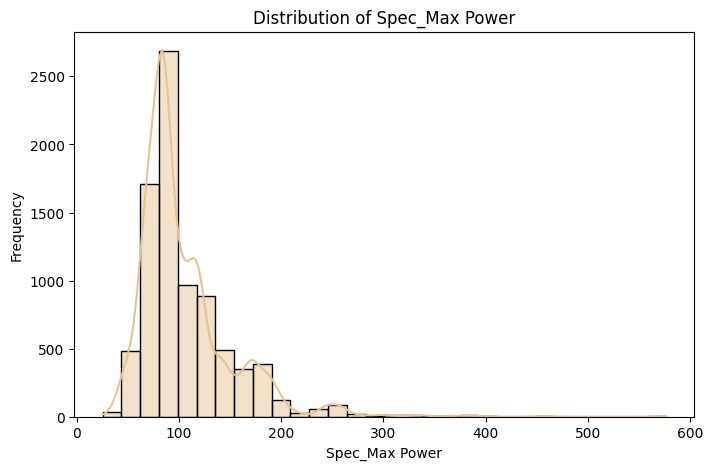

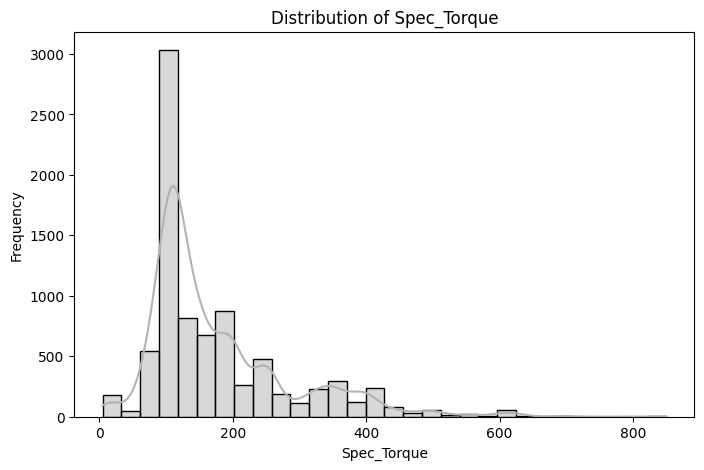

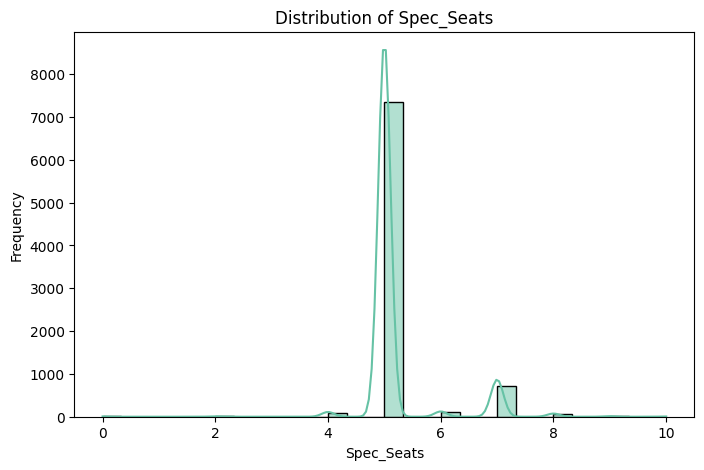

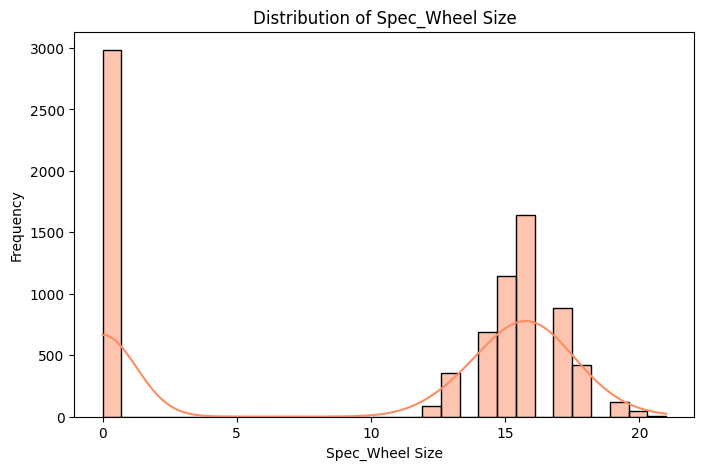

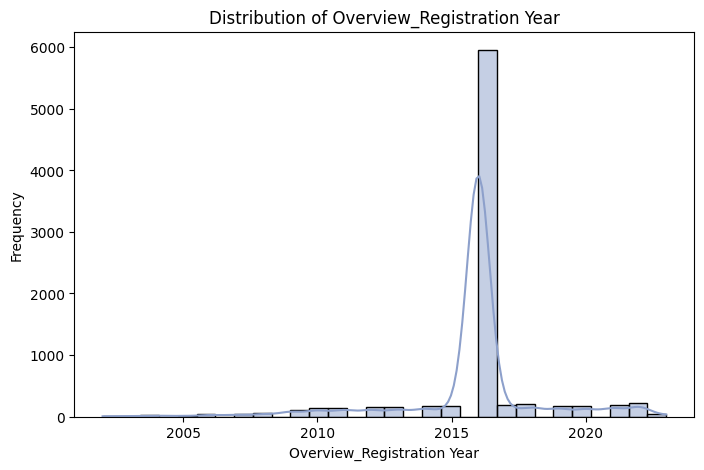

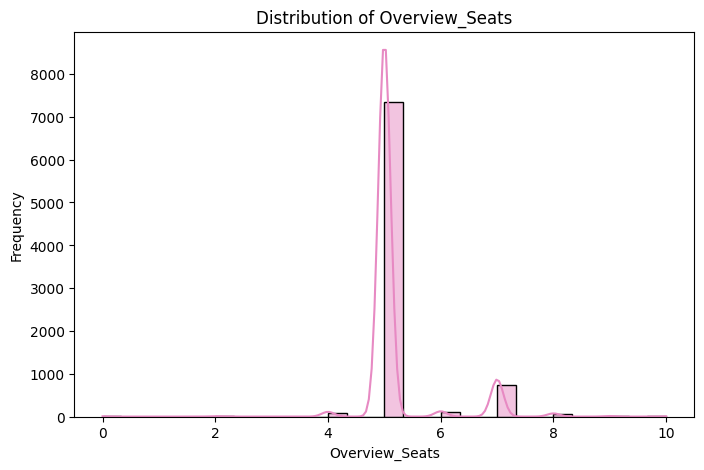

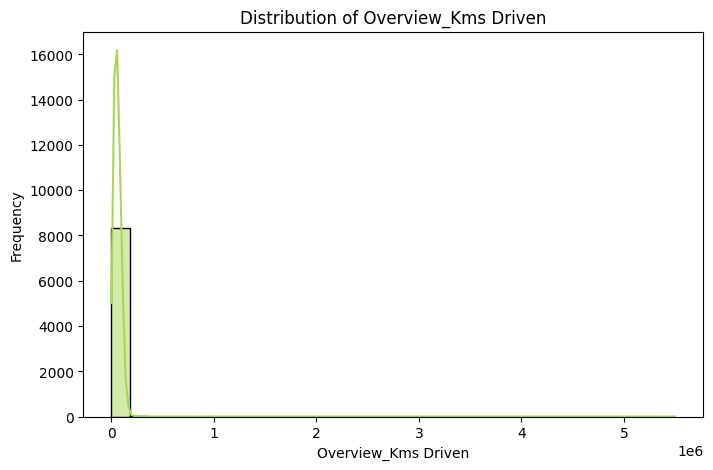

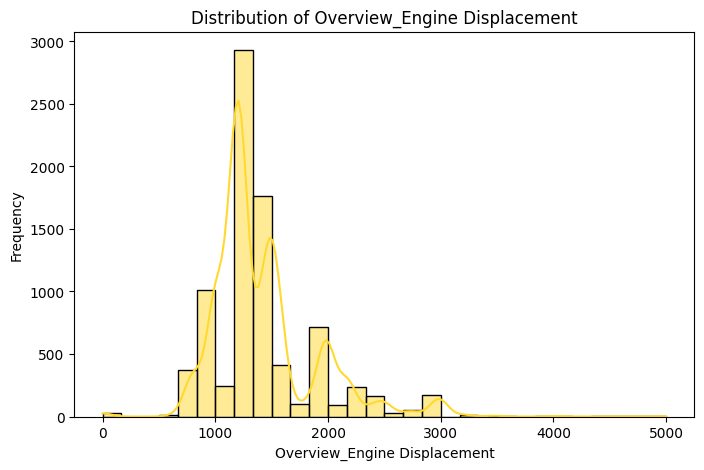

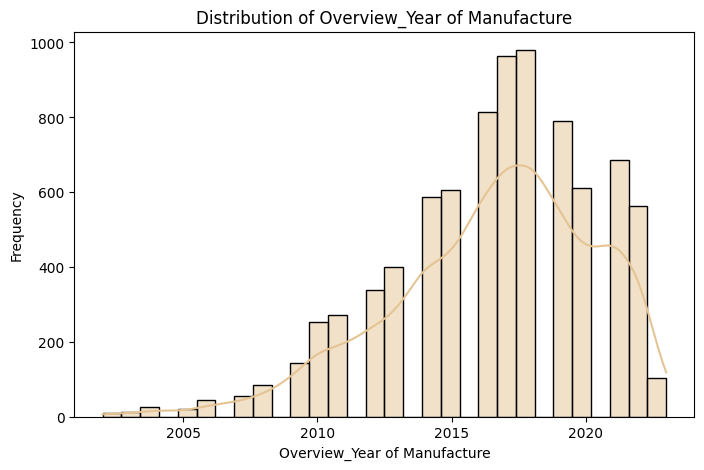

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical columns using histograms
numerical_cols = final_df.select_dtypes(include=['int64', 'float64']).columns

# Define a list of unique colors
colors = sns.color_palette("Set2", len(numerical_cols))

for i, col in enumerate(numerical_cols):
    plt.figure(figsize=(8, 5))
    sns.histplot(final_df[col], kde=True, bins=30, color=colors[i])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


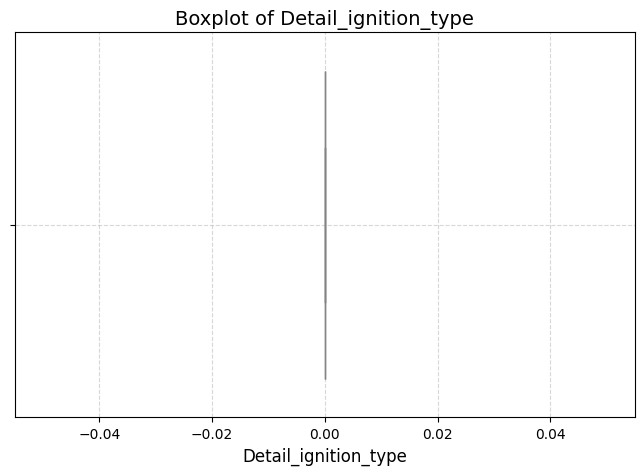

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


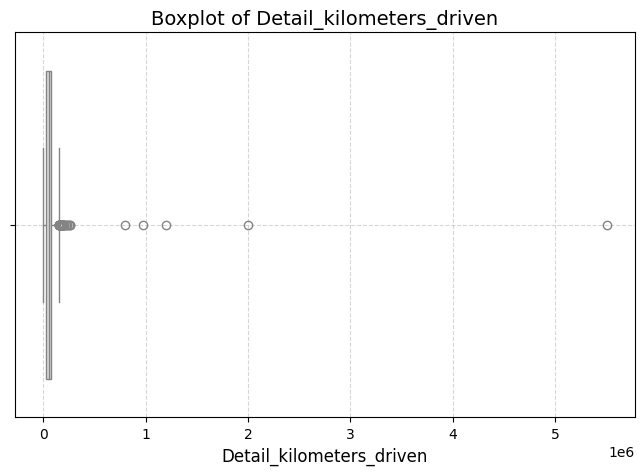

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


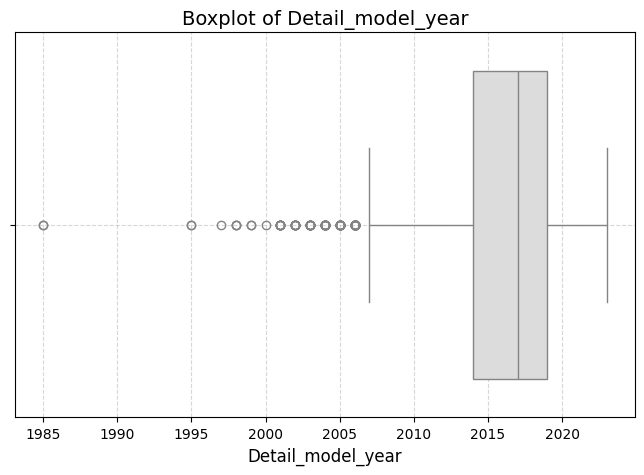

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


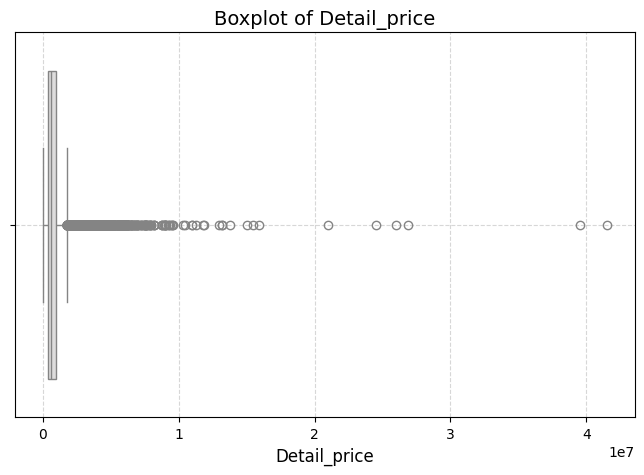

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


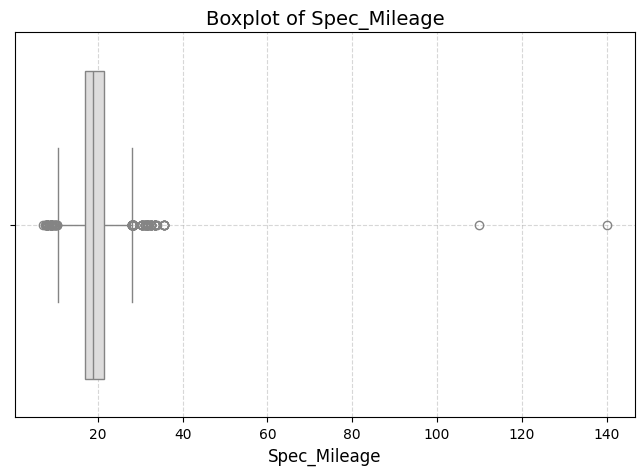

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


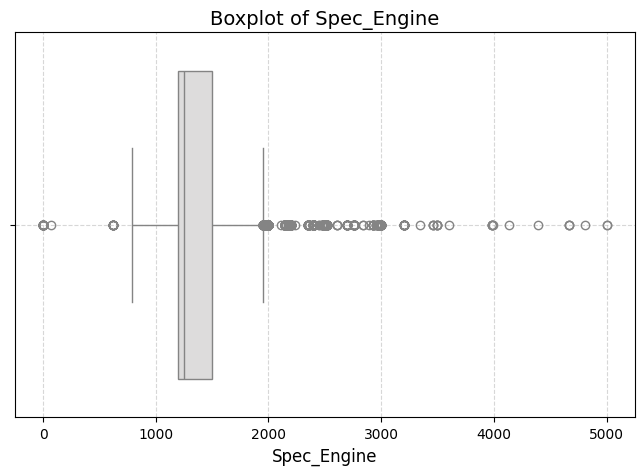

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


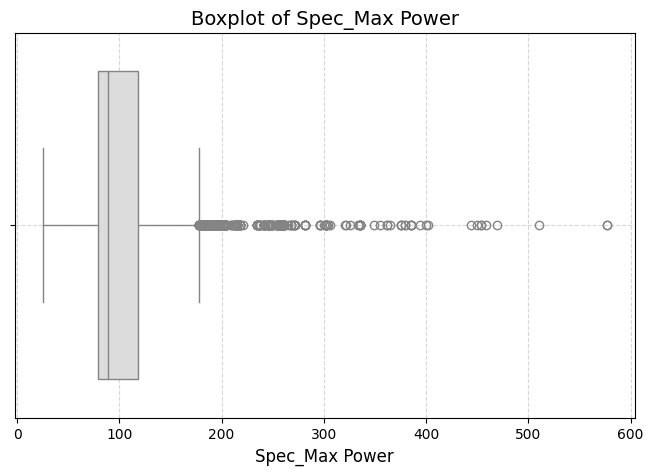

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


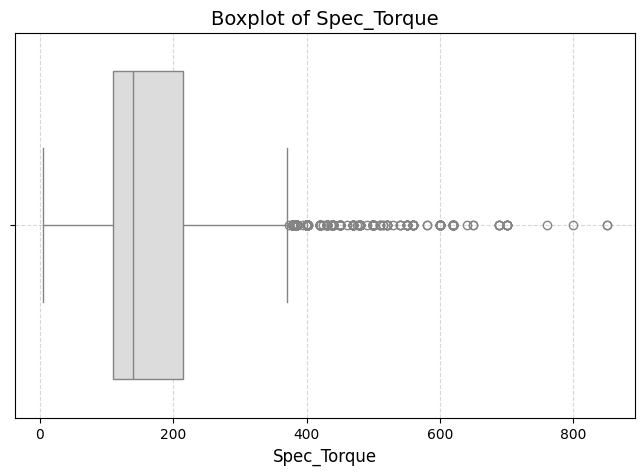

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


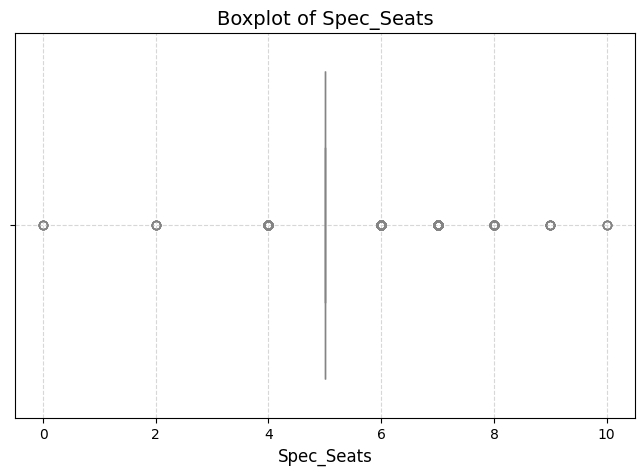

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


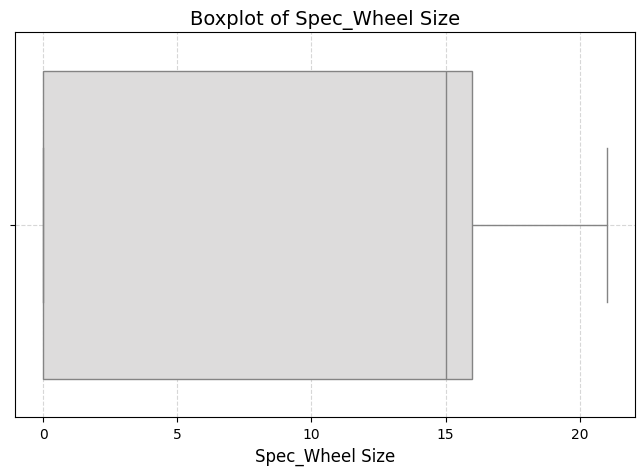

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


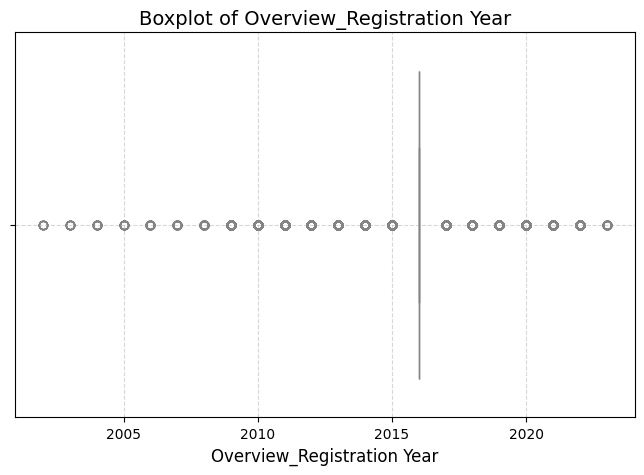

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


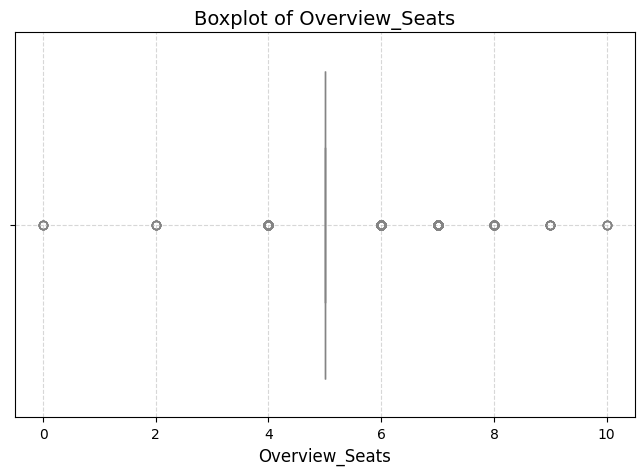

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


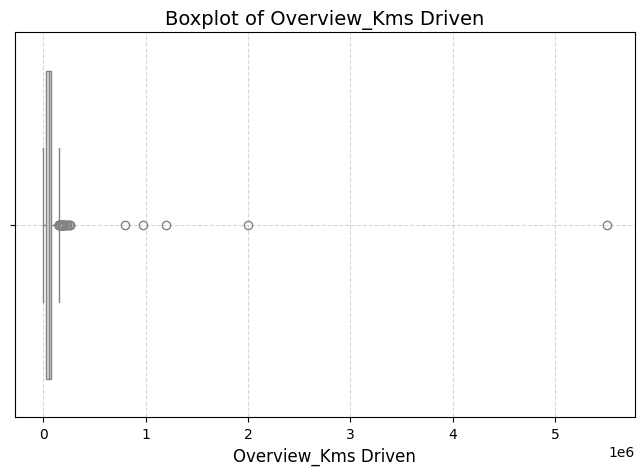

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


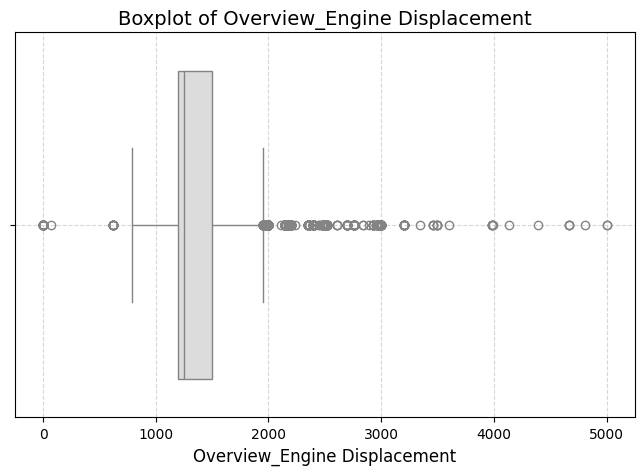

<ipython-input-23-a5effe74413a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette


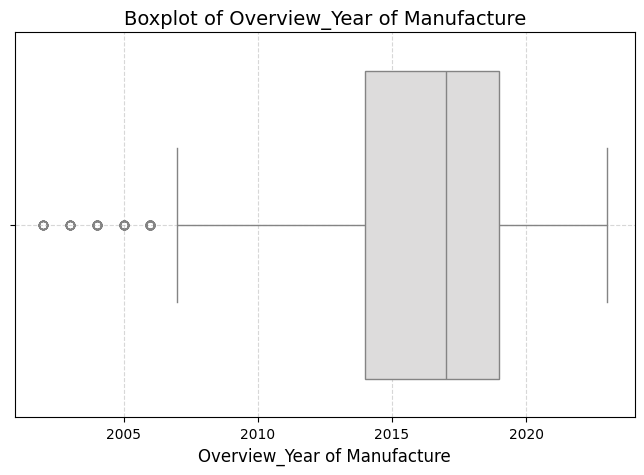

In [23]:
# Visualize boxplots to check for outliers with distinct colors
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=final_df[col], palette="coolwarm")  # Coolwarm palette
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


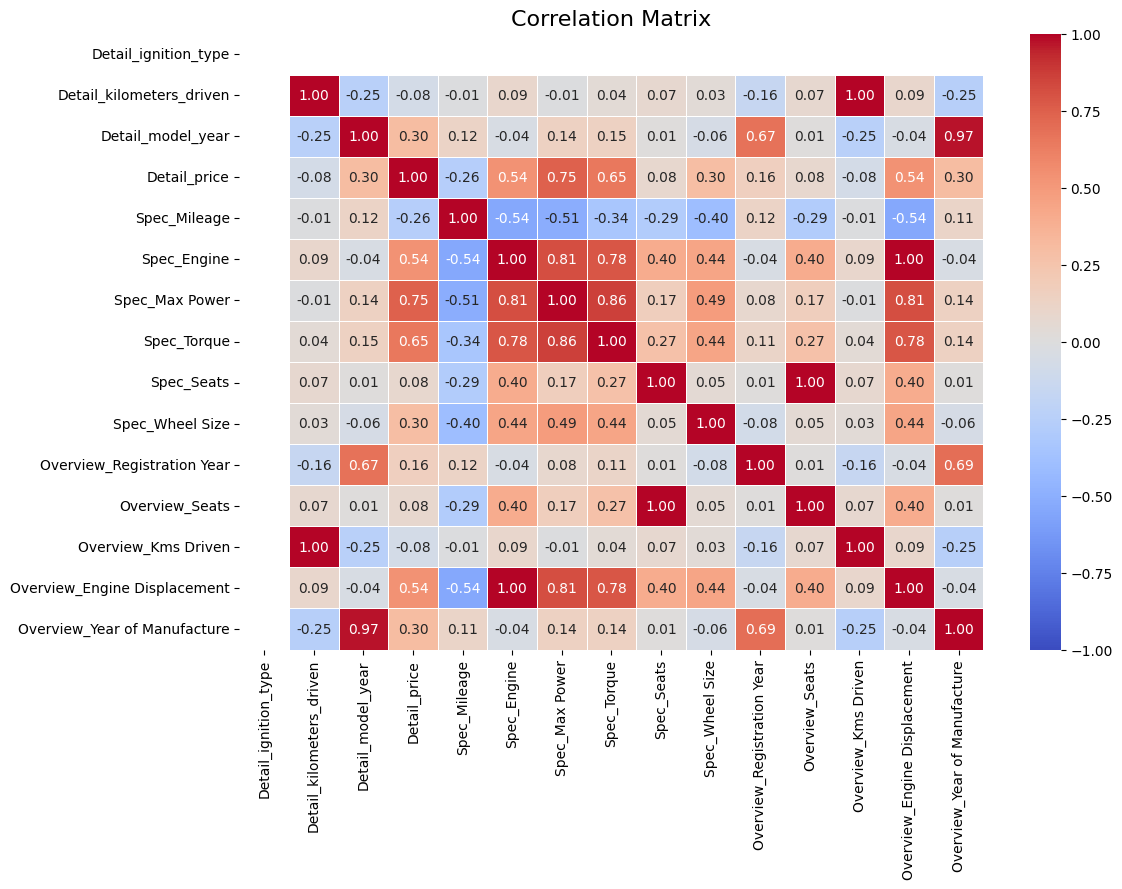

In [24]:
# Select only numerical columns for correlation
numerical_cols = final_df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = final_df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


<ipython-input-25-9f4bfb07a28f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sample_data[col], palette='Set2', order=top_categories)


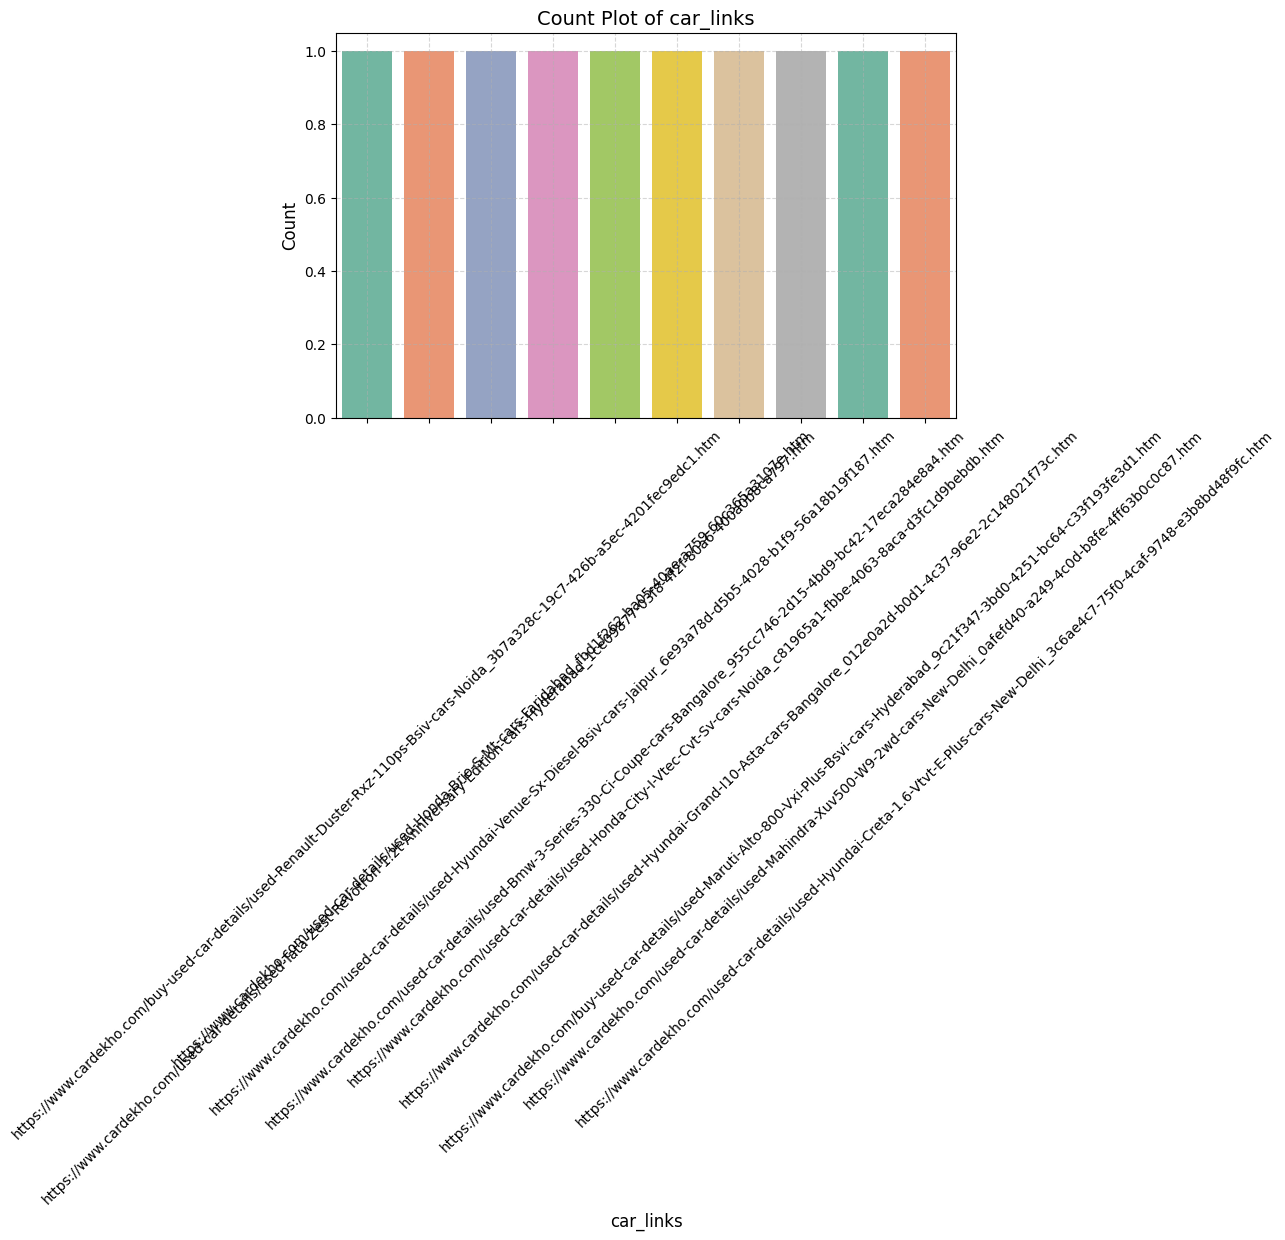

<ipython-input-25-9f4bfb07a28f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sample_data[col], palette='Set2', order=top_categories)


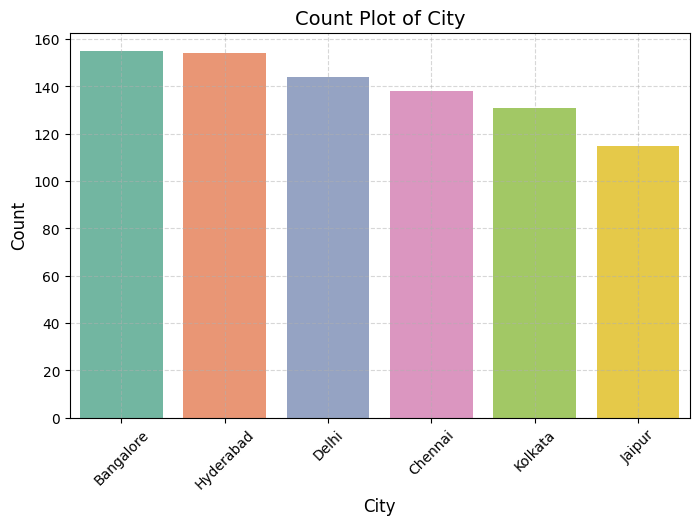

<ipython-input-25-9f4bfb07a28f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sample_data[col], palette='Set2', order=top_categories)


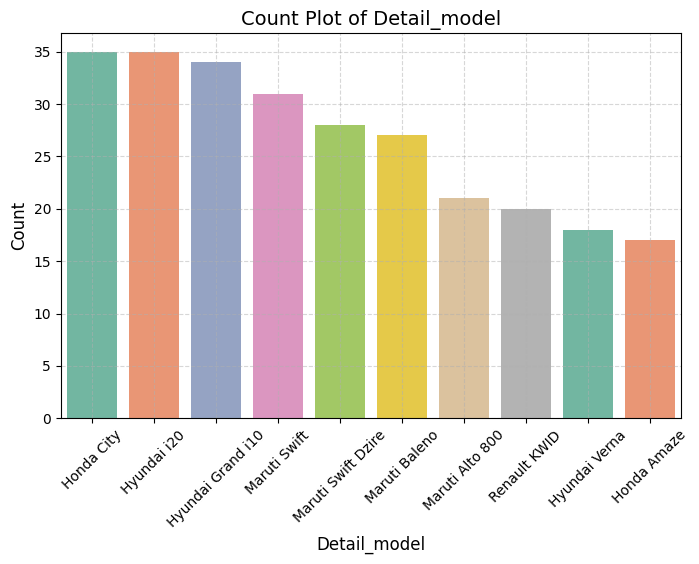

<ipython-input-25-9f4bfb07a28f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sample_data[col], palette='Set2', order=top_categories)


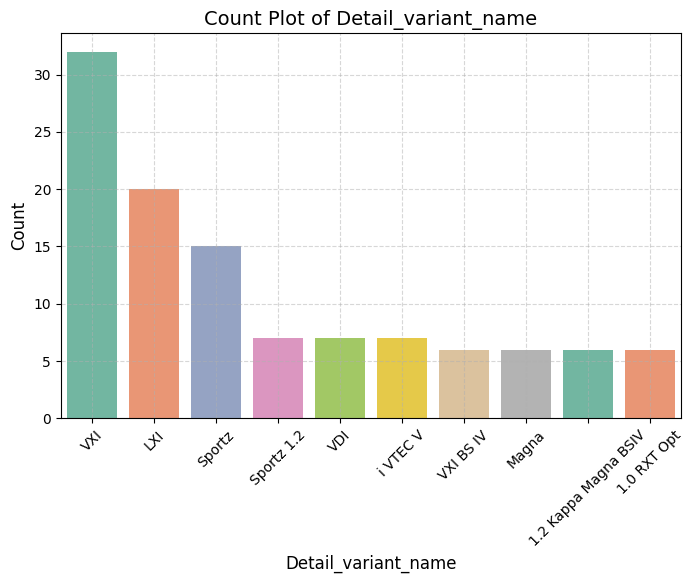

<ipython-input-25-9f4bfb07a28f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sample_data[col], palette='Set2', order=top_categories)


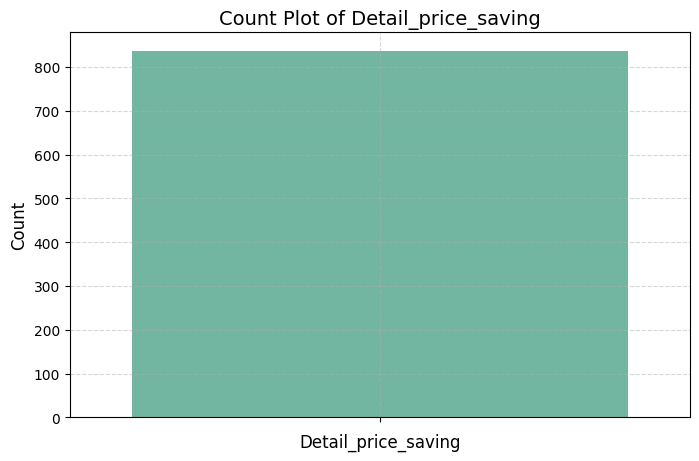

<ipython-input-25-9f4bfb07a28f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sample_data[col], palette='Set2', order=top_categories)


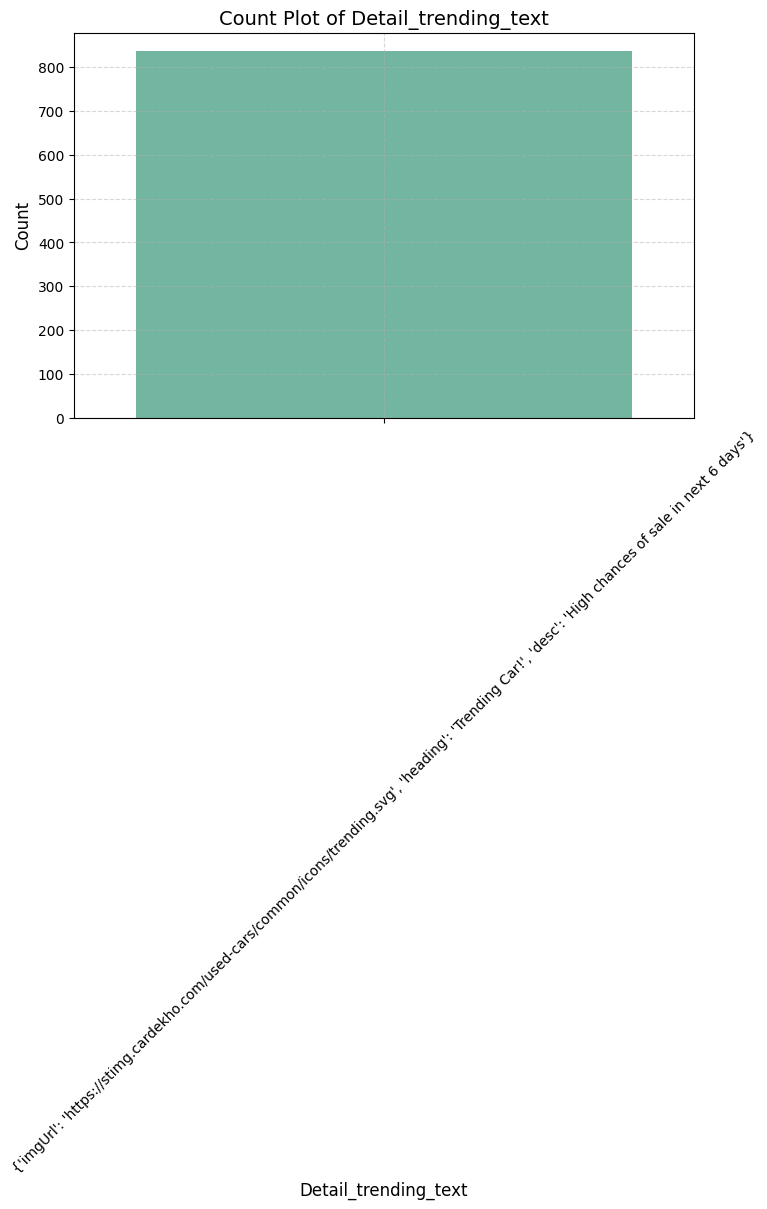

<ipython-input-25-9f4bfb07a28f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sample_data[col], palette='Set2', order=top_categories)


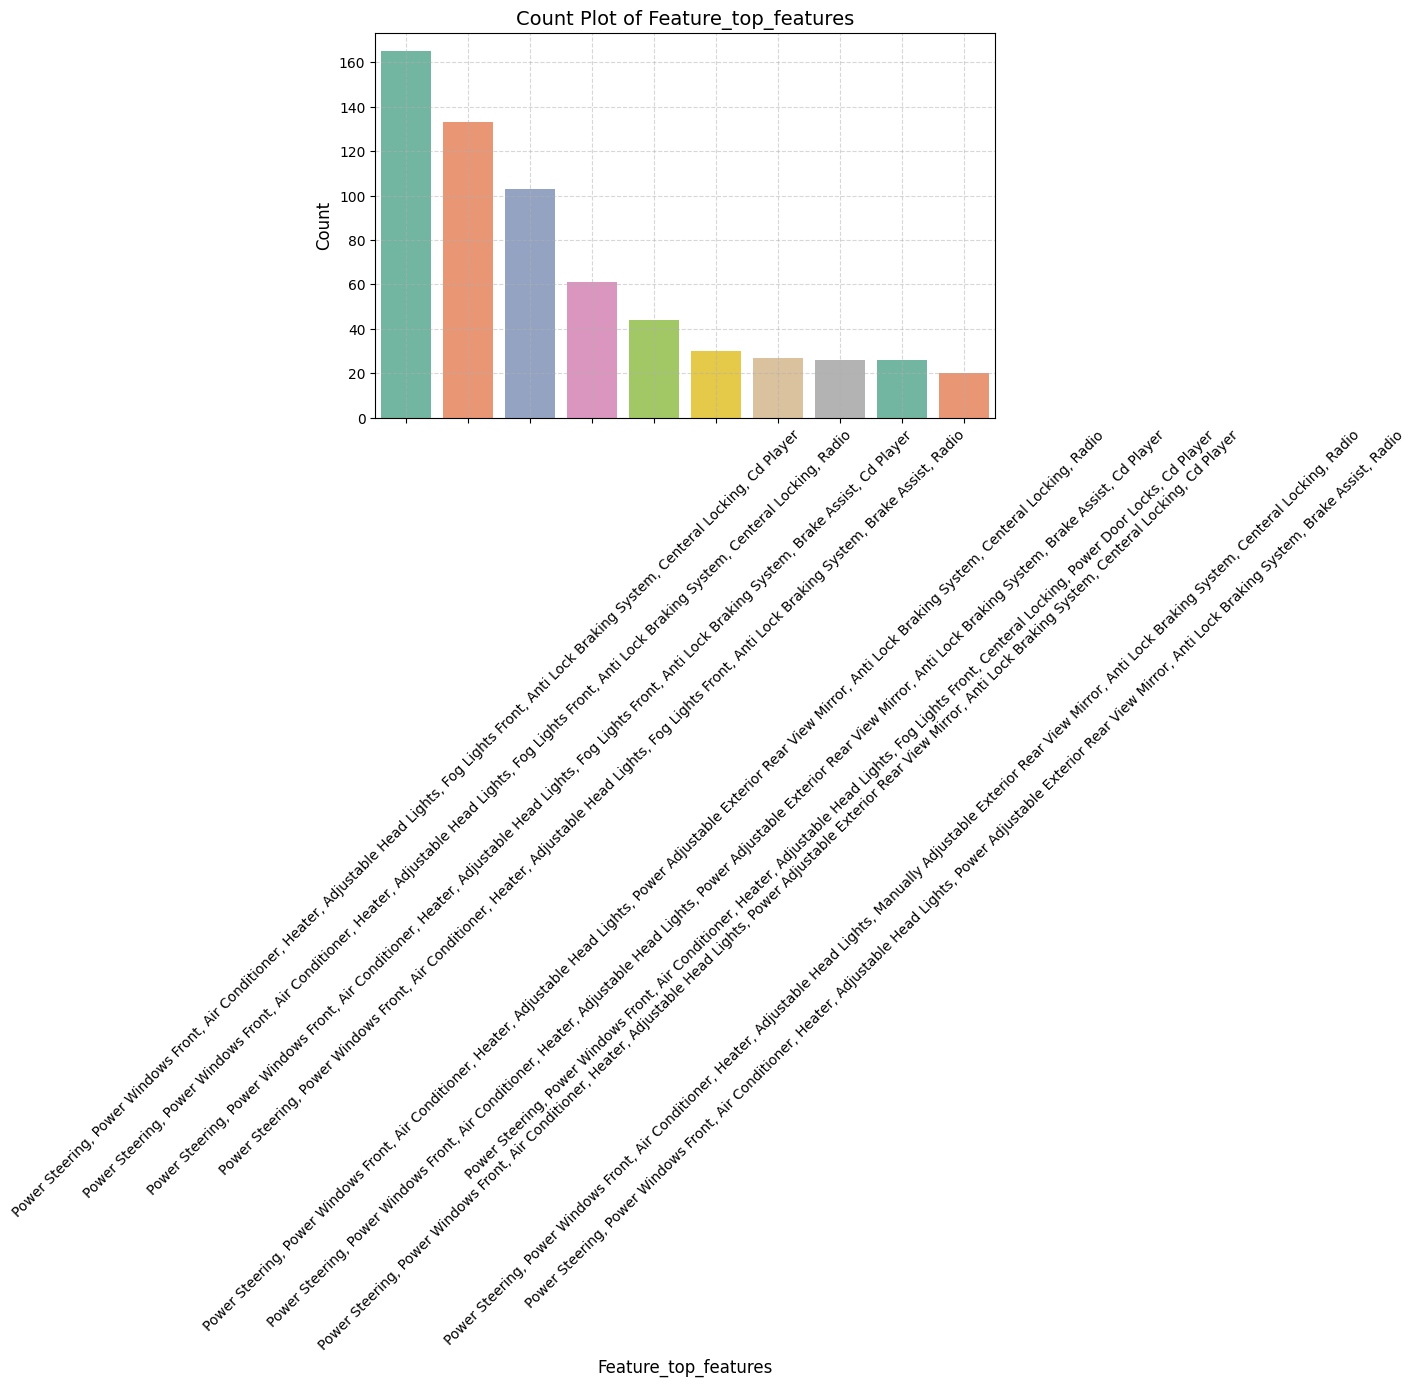

<ipython-input-25-9f4bfb07a28f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sample_data[col], palette='Set2', order=top_categories)


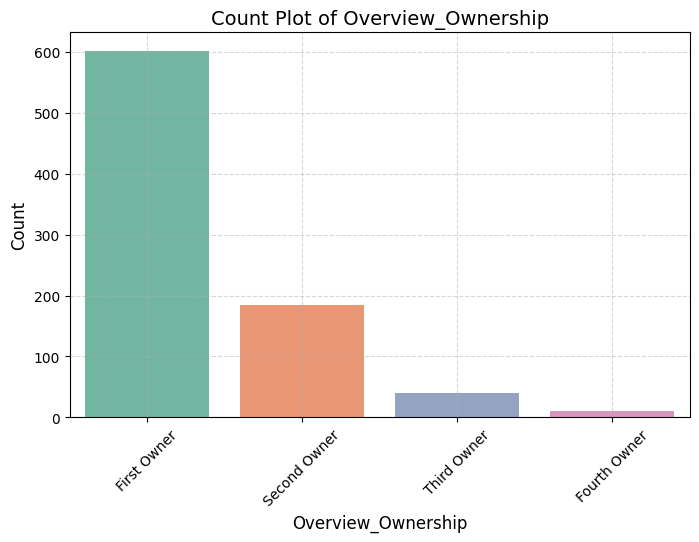

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Limit the number of categories in each categorical column
categorical_cols = final_df.select_dtypes(include=['object']).columns

# Optionally, select a smaller sample of the dataset for faster processing
sample_data = final_df.sample(frac=0.1, random_state=42)

for col in categorical_cols:
    plt.figure(figsize=(8, 5))

    # If there are too many categories, select the top 10 based on frequency
    top_categories = sample_data[col].value_counts().nlargest(10).index
    sns.countplot(x=sample_data[col], palette='Set2', order=top_categories)

    plt.title(f'Count Plot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


In [26]:
final_df.isnull().sum()

car_links                       0
City                            0
Detail_ignition_type            0
Detail_fuel_type                0
Detail_body_type                0
Detail_kilometers_driven        0
Detail_transmission_type        0
Detail_owner_number             0
Detail_ownership_details        0
Detail_manufacturer             0
Detail_model                    0
Detail_model_year               0
Detail_variant_name             0
Detail_price                    0
Detail_price_saving             0
Detail_trending_text            0
Feature_top_features            0
Spec_Mileage                    0
Spec_Engine                     0
Spec_Max Power                  0
Spec_Torque                     0
Spec_Seats                      0
Spec_Wheel Size                 0
Overview_Registration Year      0
Overview_Fuel Type              0
Overview_Seats                  0
Overview_Kms Driven             0
Overview_RTO                    0
Overview_Ownership              0
Overview_Engine Displacement    0
Overview_Transmission           0
Overview_Year of Manufacture    0
dtype: int64

In [27]:
most_frequent = final_df['Overview_Ownership'].mode()[0]
final_df['Overview_Ownership'].fillna(most_frequent, inplace=True)


<ipython-input-27-f8e845b704dc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Overview_Ownership'].fillna(most_frequent, inplace=True)


**Feature engineering**

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# 1. Log Transformation of skewed numeric columns
final_df['Detail_price_log'] = np.log1p(final_df['Detail_price'])  # Log transform of price
final_df['Overview_Kms_Driven_log'] = np.log1p(final_df['Overview_Kms Driven'])
final_df['Spec_Engine_log'] = np.log1p(final_df['Spec_Engine'])
final_df['Spec_Max_Power_log'] = np.log1p(final_df['Spec_Max Power'])

# 2. Binning (Categorization) of numeric columns
final_df['Spec_Engine_bin'] = pd.cut(final_df['Spec_Engine'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=['Low', 'Medium', 'High', 'Very High', 'Extreme'])
final_df['Spec_Wheel_Size_bin'] = pd.cut(final_df['Spec_Wheel Size'], bins=[0, 10, 15, 20], labels=['Small', 'Medium', 'Large'])

# 3. Feature Interaction (Multiplying Spec_Engine and Spec_Torque)
final_df['Engine_Torque_Interaction'] = final_df['Spec_Engine'] * final_df['Spec_Torque']

# 5. **Creating a new 'Car Age' feature from the 'Overview_Registration Year'**
final_df['Car_Age'] = 2023 - final_df['Overview_Registration Year']

# 6. **Handling high cardinality categorical features**
variant_counts = final_df['Detail_variant_name'].value_counts()
final_df['Detail_variant_name_encoded'] = final_df['Detail_variant_name'].map(variant_counts)

# Target encoding for 'City' based on 'Detail_price' (Price mean per city)
city_mean_price = final_df.groupby('City')['Detail_price'].mean()
final_df['City_encoded'] = final_df['City'].map(city_mean_price)

# 7. **Extracting length of the URL in 'Detail_trending_text'**
final_df['Trending_text_length'] = final_df['Detail_trending_text'].apply(lambda x: len(str(x)))

# 8. Extracting features from 'Feature_top_features' (example: Power Steering presence)
final_df['Has_Power_Steering'] = final_df['Feature_top_features'].apply(lambda x: 1 if 'Power Steering' in str(x) else 0)

# 9. Binning 'Spec_Mileage' into categories (Low, Medium, High)
final_df['Spec_Mileage_bin'] = pd.cut(final_df['Spec_Mileage'], bins=[0, 10, 20, 30, 140], labels=['Low', 'Medium', 'High', 'Very High'])

# 10. Dropping irrelevant features
final_df = final_df.drop(columns=['Detail_price_saving', 'Detail_trending_text', 'Feature_top_features'])

final_df.head()




In [29]:
# Check for duplicate columns
duplicate_columns = final_df.columns[final_df.columns.duplicated()]
print("Duplicate Columns:", duplicate_columns.tolist())


Duplicate Columns: []


In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode ordinal columns
ordinal_columns = ['Spec_Engine_bin', 'Spec_Wheel_Size_bin', 'Spec_Mileage_bin']
for col in ordinal_columns:
    final_df[col] = le.fit_transform(final_df[col])

print("Ordinal columns encoded successfully!")


Ordinal columns encoded successfully!


In [31]:
categorical_cols = final_df.select_dtypes(include=['object', 'category']).columns

label_encoders = {}

# Apply Label Encoding to all categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    final_df[col] = le.fit_transform(final_df[col])
    label_encoders[col] = le

# Display the transformed dataset
print("Encoded Dataset:")
print(final_df.head())

Encoded Dataset:
   car_links  City  Detail_ignition_type  Detail_fuel_type  Detail_body_type  \
0       5949     0                     0                 4                 3   
1         90     0                     0                 4                 8   
2       7770     0                     0                 4                 3   
3       1158     0                     0                 4                 9   
4       6551     0                     0                 1                 8   

   Detail_kilometers_driven  Detail_transmission_type  Detail_owner_number  \
0                    120000                         1                    3   
1                     32706                         1                    2   
2                     11949                         1                    1   
3                     17794                         1                    1   
4                     60000                         1                    1   

   Detail_ownership_details  Deta

In [33]:
final_df.columns = [
    'Car URL', 'City Name', 'Ignition Type', 'Fuel Type', 'Body Type',
    'Kilometers Driven', 'Transmission Type', 'Number of Owners', 'Ownership History',
    'Car Manufacturer', 'Car Model', 'Car Model Year', 'Car Variant', 'Car Price',
    'Mileage (km/l)', 'Engine Capacity (L)', 'Max Power (hp)', 'Torque (Nm)',
    'Seats Capacity', 'Wheel Size (inches)', 'Year of Registration', 'Fuel Type (Overview)',
    'Seats (Overview)', 'Kilometers Driven (Overview)', 'RTO Location', 'Ownership Type',
    'Engine Displacement (L)', 'Transmission (Overview)', 'Year of Manufacture',
    'Log of Car Price', 'Log of Overview Kilometers Driven', 'Log of Engine Capacity',
    'Log of Max Power', 'Engine Capacity Binned', 'Wheel Size Binned', 'Engine and Torque Interaction',
    'Car Age (years)', 'Encoded Variant Name', 'Encoded City', 'Trending Text Length',
    'Has Power Steering', 'Mileage Binned'
]


In [34]:
final_df

Car URL  City Name  Ignition Type  Fuel Type  Body Type  \
0        5949          0              0          4          3   
1          90          0              0          4          8   
2        7770          0              0          4          3   
3        1158          0              0          4          9   
4        6551          0              0          1          8   
...       ...        ...            ...        ...        ...   
8364     5968          5              0          4          3   
8365     5678          5              0          4          3   
8366     6866          5              0          4          9   
8367     6218          5              0          4          3   
8368     7250          5              0          1          8   

      Kilometers Driven  Transmission Type  Number of Owners  \
0                120000                  1                 3   
1                 32706                  1                 2   
2                 11949                  1                 1   
3                 17794                  1                 1   
4                 60000                  1                 1   
...                 ...                ...               ...   
8364              10000                  1                 1   
8365             120000                  1                 1   
8366              50000                  0                 3   
8367              40000                  1                 1   
8368             120000                  1                 2   

      Ownership History  Car Manufacturer  Car Model  Car Model Year  \
0                     3                20        160            2015   
1                     2                 6         50            2018   
2                     1                29        273            2018   
3                     1                 9         87            2014   
4                     1                20        178            2015   
...                 ...               ...        ...             ...   
8364                  1                20        160            2022   
8365                  1                20        155            2014   
8366                  3                21        197            2011   
8367                  1                20        175            2012   
8368                  2                27        236            2017   

      Car Variant  Car Price  Mileage (km/l)  Engine Capacity (L)  \
0            1806   400000.0           23.10                  998   
1             288   811000.0           17.00                 1497   
2             129   585000.0           23.84                 1199   
3             101   462000.0           19.10                 1197   
4             987   790000.0           23.65                 1248   
...           ...        ...             ...                  ...   
8364         2051   510000.0           25.24                  998   
8365         1268   180000.0           22.74                  796   
8366          891   550000.0           11.74                 1796   
8367         2069   140000.0           18.50                 1197   
8368          460   500000.0           19.72                 1461   

      Max Power (hp)  Torque (Nm)  Seats Capacity  Wheel Size (inches)  \
0              67.04        90.00               5                  0.0   
1             121.31       150.00               5                 16.0   
2              84.00       114.00               5                 14.0   
3              81.86       113.75               5                 14.0   
4              88.50       200.00               5                 16.0   
...              ...          ...             ...                  ...   
8364           65.71        89.00               5                  0.0   
8365           47.30        69.00               5                  0.0   
8366          186.00       285.00               5                 17.0   
8367           85.80  

**Taining Model**


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

target='Car Price'
# Drop the target column and any other columns you don't need for training
X = final_df.drop(columns=[target, 'Car URL', 'Car Manufacturer', 'Car Model', 'Car Variant', 'Car Model Year'])
y = final_df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (6695, 36)
Testing features shape: (1674, 36)
Training labels shape: (6695,)
Testing labels shape: (1674,)


**StandardScaler**

In [36]:
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Feture selection**

In [37]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming df is your dataframe and 'price' is the target column
X = final_df.drop(columns=['Car Price'])
y = final_df['Car Price']

# Fit a random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Get feature importance
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top 10 important features
top_features = importance.head(10)
print(top_features)


Log of Car Price        0.981747
Log of Max Power        0.003588
Max Power (hp)          0.002613
Torque (Nm)             0.001656
Wheel Size Binned       0.001436
Wheel Size (inches)     0.001103
Car Model               0.000843
Encoded Variant Name    0.000753
Kilometers Driven       0.000692
Car URL                 0.000680
dtype: float64


In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Fit an RFE model with a LinearRegression estimator
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)

# Get the selected features
selected_features_rfe = X.columns[rfe.support_]
print("Features selected by RFE:", selected_features_rfe)


Features selected by RFE: Index(['Fuel Type', 'Transmission Type', 'Number of Owners',
       'Ownership History', 'Seats Capacity', 'Year of Registration',
       'Fuel Type (Overview)', 'Seats (Overview)', 'Transmission (Overview)',
       'Car Age (years)'],
      dtype='object')


In [39]:
from sklearn.linear_model import Lasso

# Fit a Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

# Get the coefficients of the features
lasso_coef = pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)

# Display features with non-zero coefficients
important_features_lasso = lasso_coef[lasso_coef != 0]
print("Important features selected by Lasso:", important_features_lasso)


Important features selected by Lasso: Transmission (Overview)              1.854162e+06
Log of Car Price                     1.220479e+06
Fuel Type (Overview)                 6.367488e+05
Seats (Overview)                     3.757710e+05
Wheel Size Binned                    2.875871e+05
Engine Capacity Binned               2.358474e+05
Log of Engine Capacity               2.119532e+05
Car Age (years)                      1.146819e+05
Year of Registration                 7.053882e+04
Max Power (hp)                       4.469238e+04
Number of Owners                     4.169074e+04
City Name                            3.554742e+04
Wheel Size (inches)                  2.629443e+04
Mileage Binned                       9.211542e+03
Year of Manufacture                  7.176487e+03
Car Model                            2.170816e+03
Engine Capacity (L)                  1.834358e+03
Mileage (km/l)                       1.041511e+03
Car URL                              1.965805e+01
Encoded Vari

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.940e+15, tolerance: 1.678e+12
  model = cd_fast.enet_coordinate_descent(


**Model Fit**

**MODEL SELECTION**

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Define models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(alpha=0.1, max_iter=2000),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results in the results dictionary
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print("Model Performance:\n", results_df)


Model Performance:
                              MAE          RMSE        R2
Linear Regression  437410.948305  1.113534e+06  0.584574
Ridge              437391.432642  1.113542e+06  0.584569
Lasso              437410.892265  1.113534e+06  0.584574
Decision Tree      255909.168658  8.660673e+05  0.748702
Random Forest      198140.860614  6.616236e+05  0.853341
Gradient Boosting  228326.372013  6.542759e+05  0.856581


In [107]:
# Updated list of features
selected_features = [
    'Max Power (hp)', 'Kilometers Driven', 'Wheel Size (inches)',
    'Torque (Nm)', 'Car Age (years)', 'Year of Registration',
    'Seats Capacity', 'Fuel Type', 'Transmission Type',
    'Wheel Size Binned', 'Mileage (km/l)', 'Engine Capacity (L)'
]

# Ensure the selected features exist in the dataset
X = final_df[selected_features]
y = final_df['Car Price']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**GradientBoostingRegressor is best model**

In [86]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Preprocessing for numerical features: standardizing the numeric features
numeric_features = [
    'Max Power (hp)', 'Kilometers Driven', 'Wheel Size (inches)',
    'Torque (Nm)', 'Car Age (years)', 'Year of Registration',
    'Seats Capacity', 'Mileage (km/l)', 'Engine Capacity (L)'
]

# Define the preprocessor with standard scaling for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Apply StandardScaler to numerical features
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Create a pipeline that includes preprocessing and the model
pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=best_ridge_params['alpha']))  # Using the best alpha found earlier
])

pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=best_lasso_params['alpha']))  # Using the best alpha found earlier
])

pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, random_state=42))  # Using the fixed GB model
])


# Cross-validation for Ridge
cv_ridge_scores = cross_val_score(pipeline_ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_ridge_mean = -np.mean(cv_ridge_scores)
print(f"Ridge Cross-Validation MSE: {cv_ridge_mean}")

# Fit Lasso model
pipeline_lasso.fit(X_train, y_train)
y_pred_lasso = pipeline_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso MSE: {mse_lasso}")
print(f"Lasso R²: {r2_lasso}")

# Cross-validation for Lasso
cv_lasso_scores = cross_val_score(pipeline_lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_lasso_mean = -np.mean(cv_lasso_scores)
print(f"Lasso Cross-Validation MSE: {cv_lasso_mean}")

# Fit Gradient Boosting model
pipeline_gb.fit(X_train, y_train)
y_pred_gb = pipeline_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Gradient Boosting R²: {r2_gb}")

# Cross-validation for Gradient Boosting
cv_gb_scores = cross_val_score(pipeline_gb, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_gb_mean = -np.mean(cv_gb_scores)
print(f"Gradient Boosting Cross-Validation MSE: {cv_gb_mean}")




Ridge MSE: 1289654776311.2695
Ridge R²: 0.5679244869184867
Ridge Cross-Validation MSE: 754631159013.822
Lasso MSE: 1265375110953.904
Lasso R²: 0.5760589497681006
Lasso Cross-Validation MSE: 745703332562.803
Gradient Boosting MSE: 397380312071.5902
Gradient Boosting R²: 0.8668649119278853
Gradient Boosting Cross-Validation MSE: 354057712853.10364


In [114]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Preprocessing for numerical features: standardizing the numeric features
numeric_features = [
    'Max Power (hp)', 'Kilometers Driven', 'Wheel Size (inches)',
    'Torque (Nm)', 'Car Age (years)', 'Year of Registration',
    'Seats Capacity', 'Mileage (km/l)', 'Engine Capacity (L)'
]

# Define the preprocessor with standard scaling for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Apply StandardScaler to numerical features
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, random_state=42))  # Using the fixed GB model
])


# Fit Gradient Boosting model
pipeline_gb.fit(X_train, y_train)
y_pred_gb = pipeline_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Gradient Boosting R²: {r2_gb}")

# Cross-validation for Gradient Boosting
cv_gb_scores = cross_val_score(pipeline_gb, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_gb_mean = -np.mean(cv_gb_scores)
print(f"Gradient Boosting Cross-Validation MSE: {cv_gb_mean}")




Gradient Boosting MSE: 397380312071.5902
Gradient Boosting R²: 0.8668649119278853
Gradient Boosting Cross-Validation MSE: 354057712853.10364


**. Hyperparameter Tuning (Fine-tuning)**

In [84]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.82793643 0.85174821 0.80681179 0.79215769 0.77607864]
Mean cross-validation score: 0.8109465509464326


**Saving the Model**

In [115]:
import joblib

# Save the trained model
joblib.dump(pipeline_gb, 'gradient_boosting_model.joblib')


['gradient_boosting_model.joblib']

**predictions on both test data and new input data**

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assume final_df is your dataset, make sure to use the correct column names
# Feature and target columns for prediction
selected_features = [
    'Fuel Type', 'Transmission Type', 'Car Age (years)', 'Kilometers Driven',
    'Mileage (km/l)', 'Seats Capacity', 'Engine Capacity (L)', 'Max Power (hp)',
    'Torque (Nm)', 'Year of Registration', 'Wheel Size (inches)'
]
target_col = 'Car Price'  # Target column

X = final_df[selected_features]
y = final_df[target_col]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline_gb.fit(X_train, y_train)

# Evaluate the pipeline on the test data
y_pred = pipeline_gb.predict(X_test)

# Model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Store evaluation results in a dataframe
model_metrics = pd.DataFrame({
    "model": ["Gradient Boosting "],
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse],
    "R²": [r2]
})

print(model_metrics)

# New data for car price prediction
new_df = pd.DataFrame({
    'Fuel Type': ['Diesel'],
    'Transmission Type': ['Automatic'],
    'Car Age (years)': [4],
    'Kilometers Driven': [35000],
    'Mileage (km/l)': [18],
    'Seats Capacity': [5],
    'Engine Capacity (L)': [2.0],
    'Max Power (hp)': [190],
    'Torque (Nm)': [400],
    'Year of Registration': [2020],
    'Wheel Size (inches)': [16]
}, index=[0])

# Predict the car price for the new data
prediction = pipeline_gb.predict(new_df)

# Output the predicted price
print(f"The predicted price of the car is: ₹{round(prediction[0], 2)}")


                model            MAE           MSE           RMSE        R²
0  Gradient Boosting   218712.655958  3.973803e+11  630381.084798  0.866865
The predicted price of the car is: ₹4923483.28


In [113]:
import pickle

# Pickle the pipeline (preprocessing + model)
with open('car_price_prediction_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
